| Name | Surname | ID Number |
|------|---------|---------------------|
| Lorenzo | Calandra Buonaura | 2107761 |

In [7]:
library("dplyr", warn.conflicts = FALSE, quietly = TRUE)
library("ggplot2", warn.conflicts = FALSE, quietly = TRUE)
library("spatstat", warn.conflicts = FALSE, quietly = TRUE)
library("coda", warn.conflicts = FALSE, quietly = TRUE)
library("rjags", warn.conflicts = FALSE, quietly = TRUE)
library("gridExtra", warn.conflicts = FALSE, quietly = TRUE)

# Exercise 1

Given the following un-normalized posterior distribution:

$
g(\theta ∣ x) \propto \frac{1}{2} \exp{\left(-\frac{(\theta + 3)^2}{2}\right)} + \frac{1}{2} \exp{\left(-\frac{(\theta - 3)^2}{2}\right)}
$

- Draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm
- Use a Norm (0, 1) as random-walk candidate density
- Plot the sampled distribution
- Analyze the chain with the CODA package and plot the chain autocorrelation
- Try to use different burn-in cycles and thinning and plot the corresponding posterior distribution and the chain autocorrelation function. What are the best parameters? 

In [2]:
post_distr <- function(theta) {
  return(1 / 2 * (exp(- (theta + 3) ^ 2 / 2) + exp(- (theta - 3) ^ 2 / 2)))
}

metropolis_step <- function(theta) {
  proposed_theta <- rnorm(1, theta, 1)
  prob_r <- dnorm(theta, proposed_theta, 1) / dnorm(proposed_theta, theta, 1)
  accept_prob <- min(1, prob_r * post_distr(proposed_theta) / post_distr(theta))
  u <- runif(1)

  if (u <= accept_prob) {
    value <- proposed_theta
    accepted <- TRUE
  } else {
    value <- theta
    accepted <- FALSE
  }

  out <- data.frame(value = value, accepted = accepted)
  out
}

metropolis_sampler <- function(initial_theta, n, burn_in = 0) {
  results <- list()
  current_theta <- initial_theta
  n <- n + burn_in

  for (i in 1:burn_in) {
    out <- metropolis_step(current_theta)
    current_theta <- out$value
  }

  for (i in 1:n) {
    out <- metropolis_step(current_theta)
    current_theta <- out$value
    results[[i]] <- out
  }

  results <- do.call(rbind, results)
  results
}

In [3]:
theta_values <- seq(-8, 8, 0.1)
post_values <- post_distr(theta_values) / sum(post_distr(theta_values))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


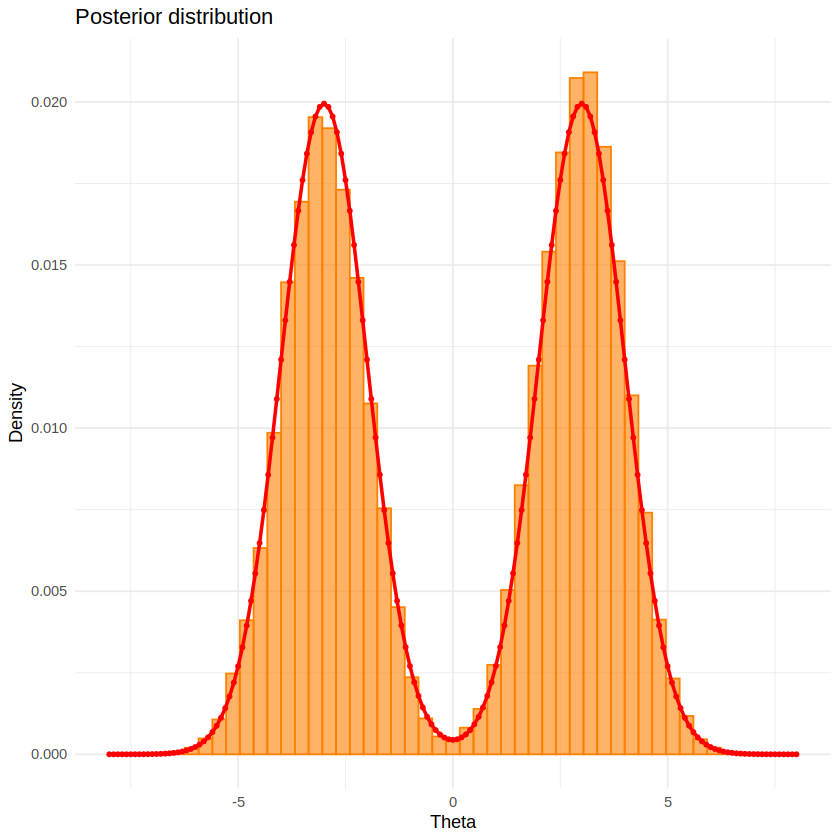

In [4]:
random_theta <- rnorm(1, 0, 1)
n_sample <- 100000
out <- metropolis_sampler(random_theta, n_sample)

n_bins <- 50
bin_w <- (max(theta_values) - min(theta_values)) / n_bins

ggplot(data = data.frame(out$value), aes(x = out$value)) +
  geom_histogram(aes(y = after_stat(count / sum(count)) * bin_w),
                 color = "#ff8000", fill = "#ff8000", binwidth = bin_w,
                 bins = n_bins, alpha = 0.6) +
  geom_point(data = data.frame(theta_values, post_values),
             aes(x = theta_values, y = post_values), color = "red", size = 1) +
  geom_line(data = data.frame(theta_values, post_values),
            aes(x = theta_values, y = post_values), color = "red",
            linewidth = 1) +
  labs(title = "Posterior distribution",
       x = "Theta",
       y = "Density") +
  xlim(min(theta_values), max(theta_values)) +
  theme_minimal()

Normalized effective size: 315.12

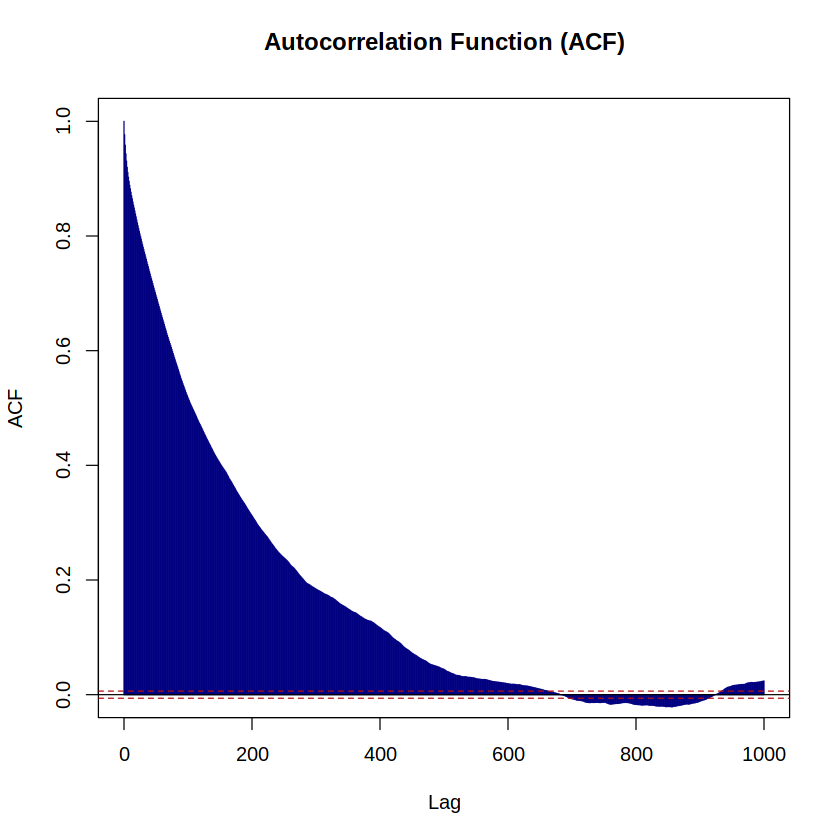

In [5]:
chain <- as.mcmc(out$value)
acf(chain, lag.max = 1000, main = "Autocorrelation Function (ACF)",
    ylim = c(0, 1), col = "navy", ci.col = "#b71111")

cat("Normalized effective size:", effectiveSize(chain))

In [6]:
plot_posterior <- function(values, theta_values, post_values, n_bins) {
  bin_w <- (max(theta_values) - min(theta_values)) / n_bins

  p <- ggplot(data = data.frame(values), aes(x = values)) +
    geom_histogram(aes(y = after_stat(count / sum(count)) * bin_w),
                   color = "#ffc800", fill = "#ffc800", binwidth = bin_w,
                   bins = n_bins, alpha = 0.6) +
    labs(title = "Posterior distribution",
         x = "Theta",
         y = "Density") +
    xlim(min(theta_values), max(theta_values)) +
    theme_minimal()

  print(p)
}

plot_acf <- function(out, thinning, lag_max) {
  thinned_out <- out[seq(1, to = nrow(out), by = thinning), ]
  chain <- as.mcmc(thinned_out$value)
  norm <- nrow(out) / thinning

  acf(chain, lag.max = lag_max, main = "Autocorrelation Function (ACF)",
      ylim = c(-0.1, 1), col = "navy", ci.col = "#b71111")

  return(effectiveSize(chain) / norm)
}

Running with burn_in = 100 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


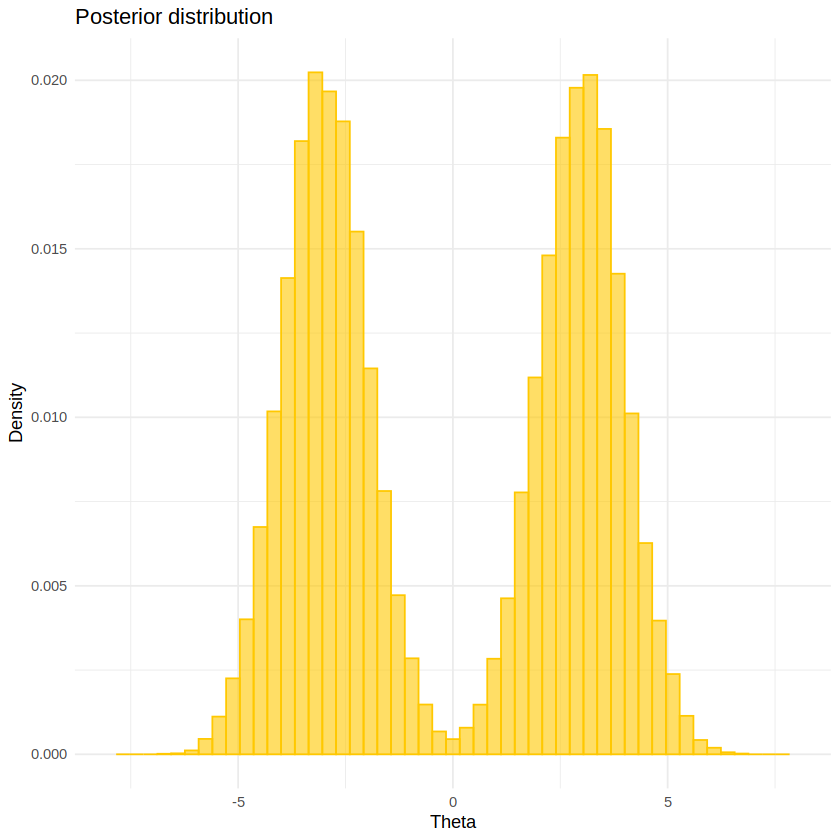

Normalized effective size = 0.003649735 
#################################

Running with burn_in = 100 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


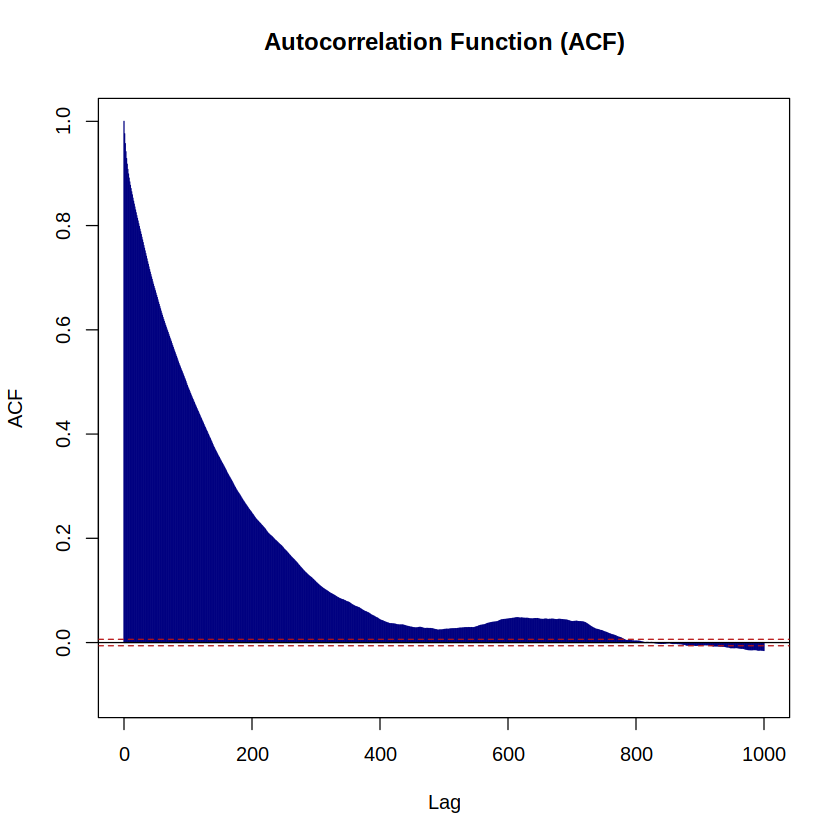

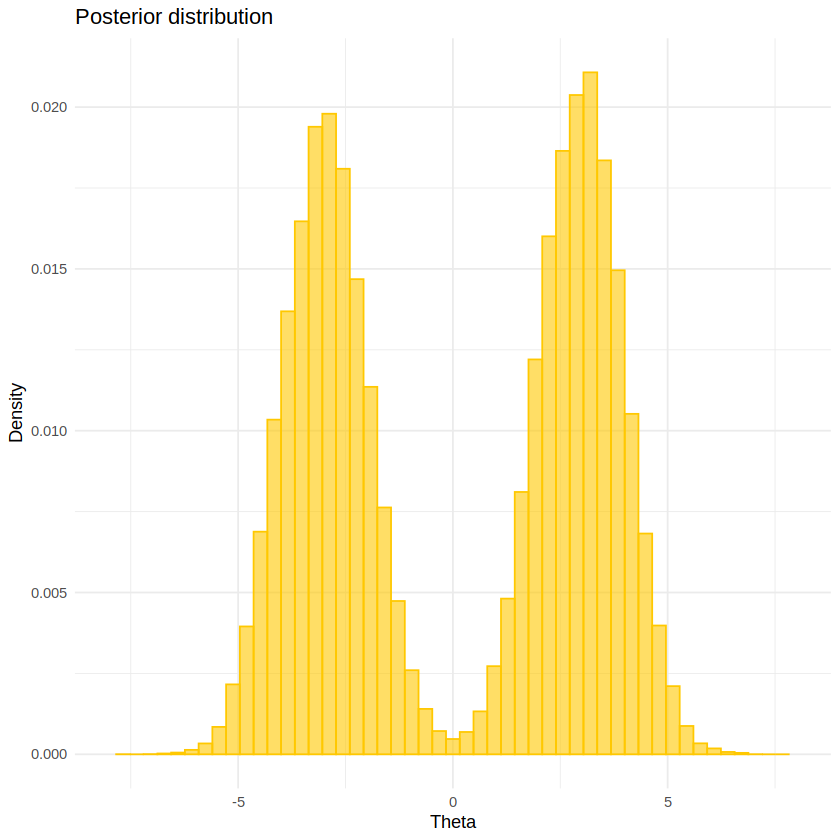

Normalized effective size = 0.01626775 
#################################

Running with burn_in = 100 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


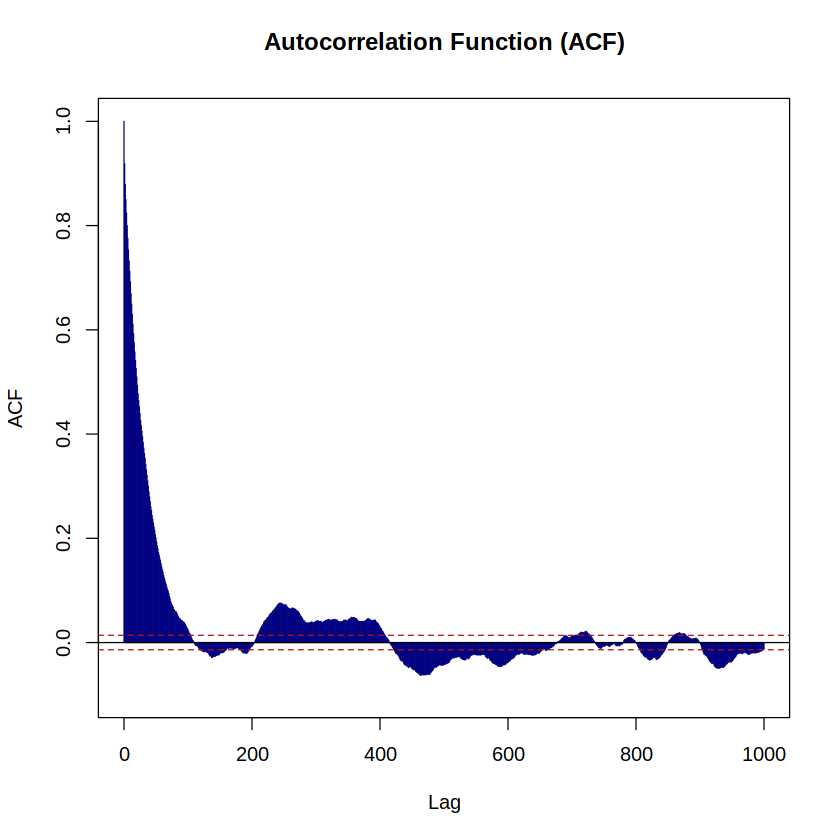

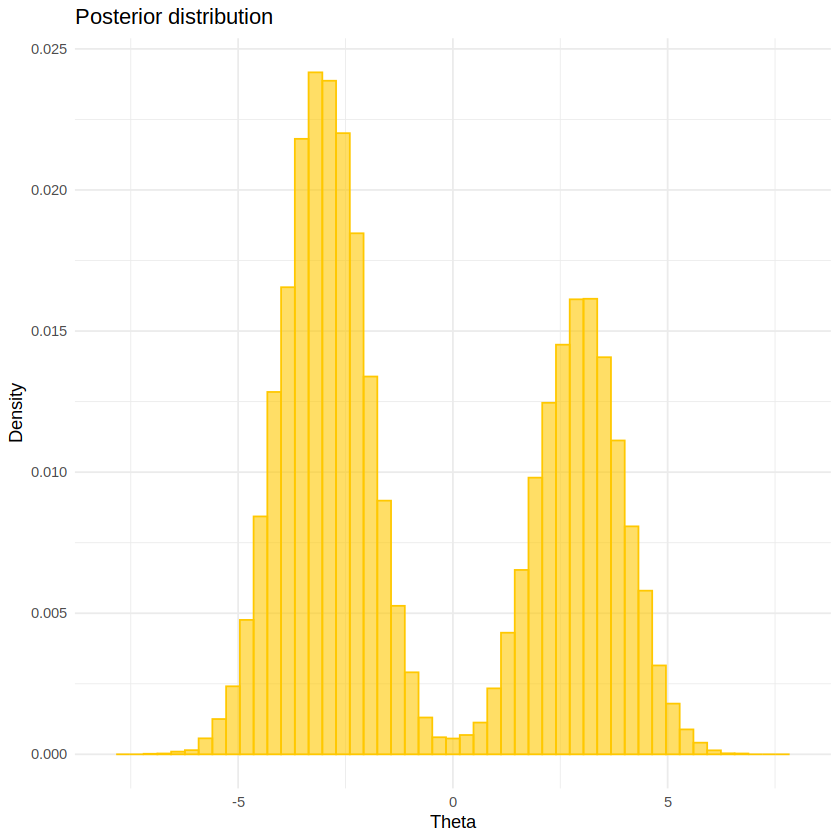

Normalized effective size = 0.03505231 
#################################

Running with burn_in = 100 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


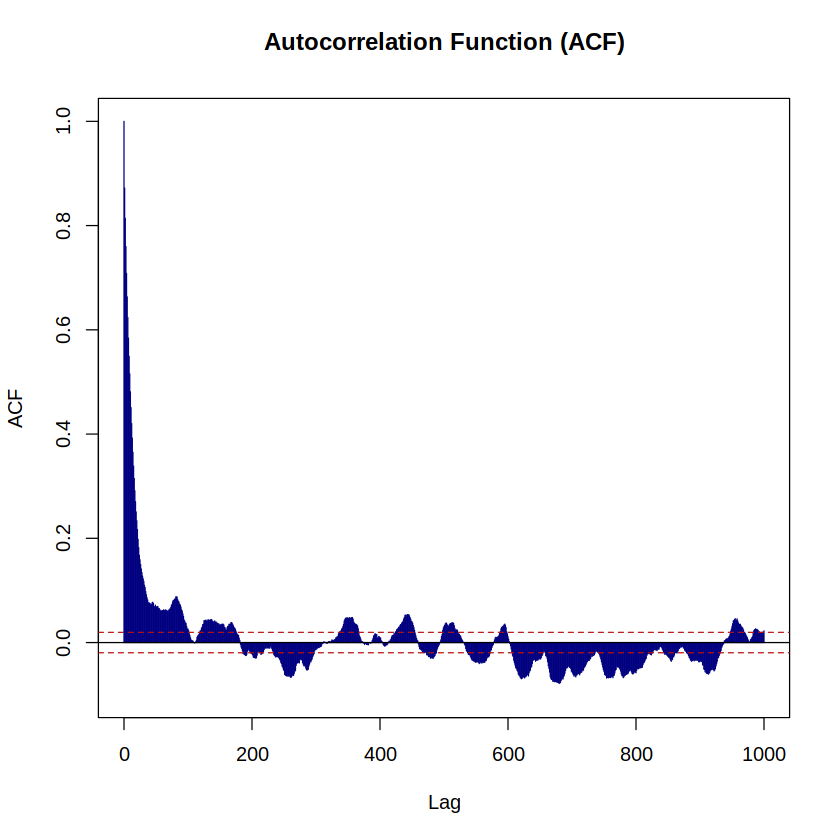

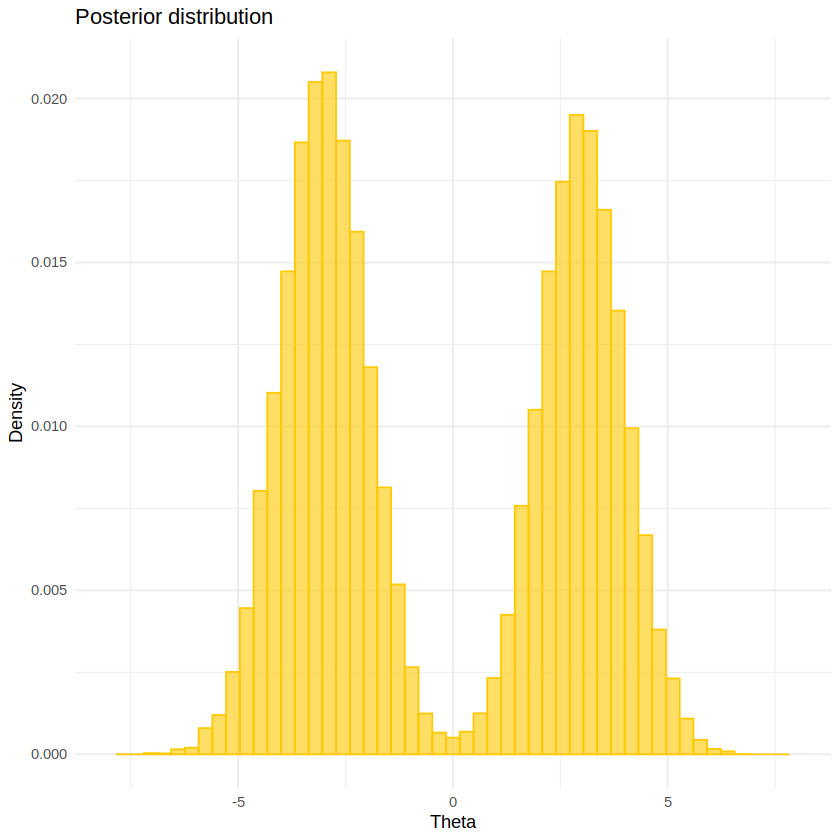

Normalized effective size = 0.04441192 
#################################

Running with burn_in = 100 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


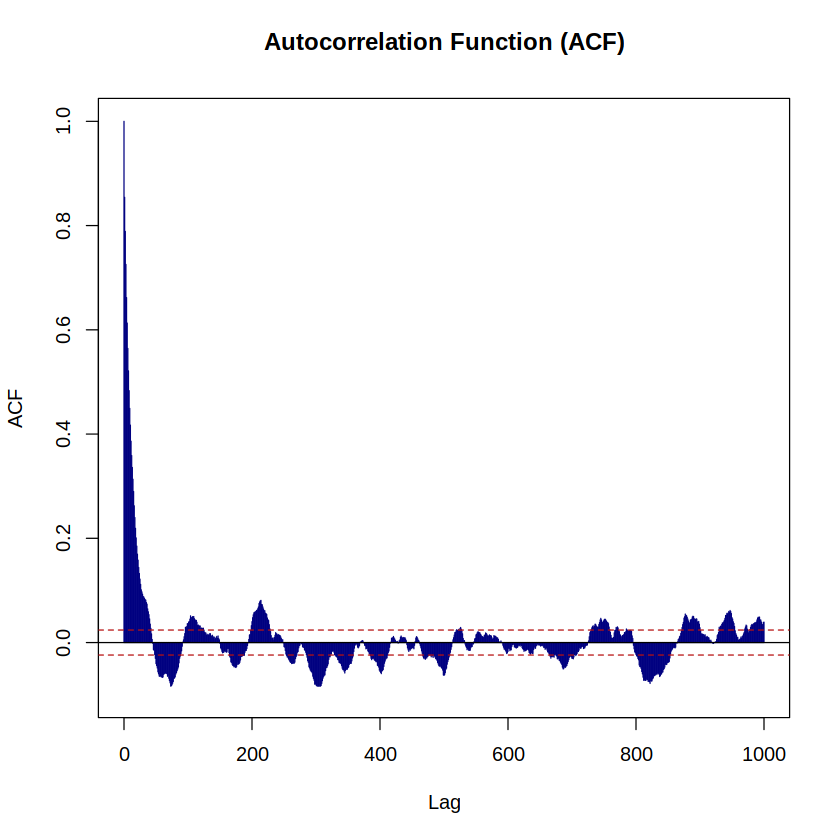

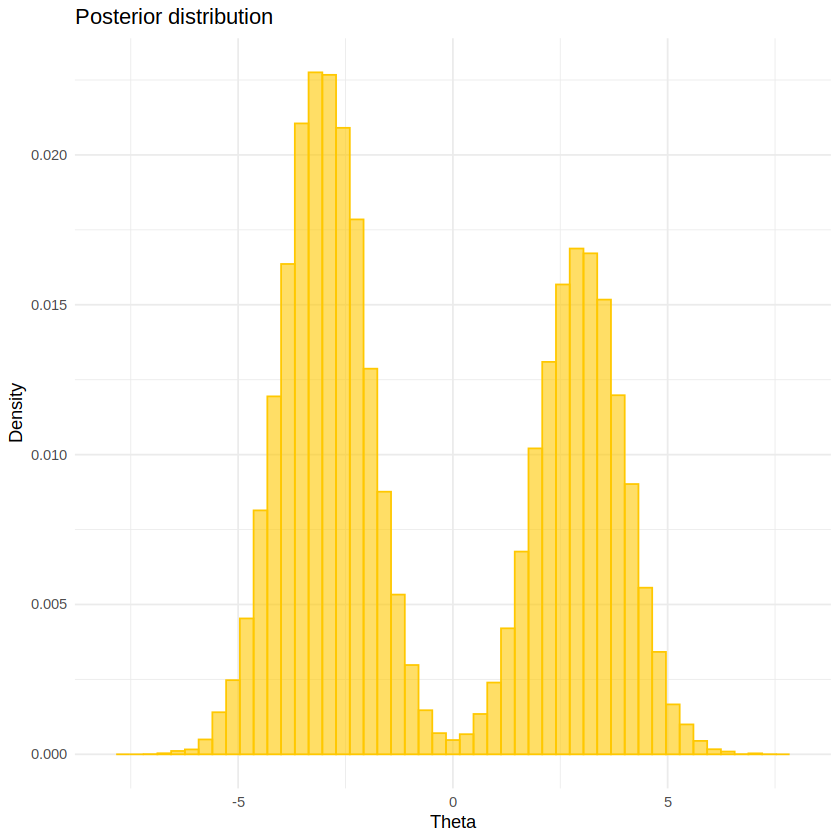

Normalized effective size = 0.07273153 
#################################

Running with burn_in = 1000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


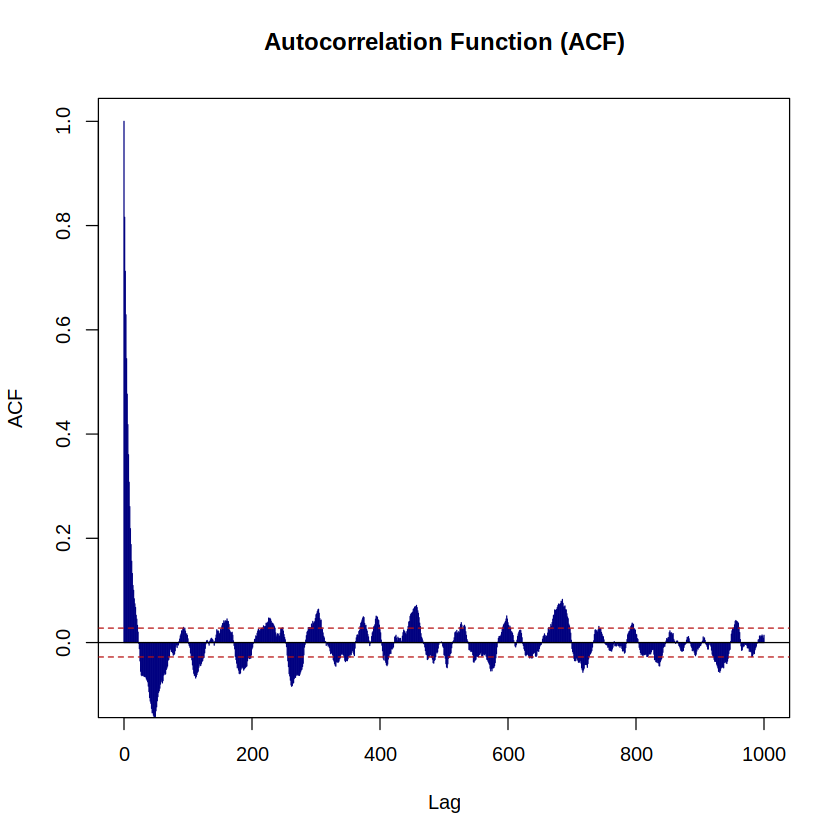

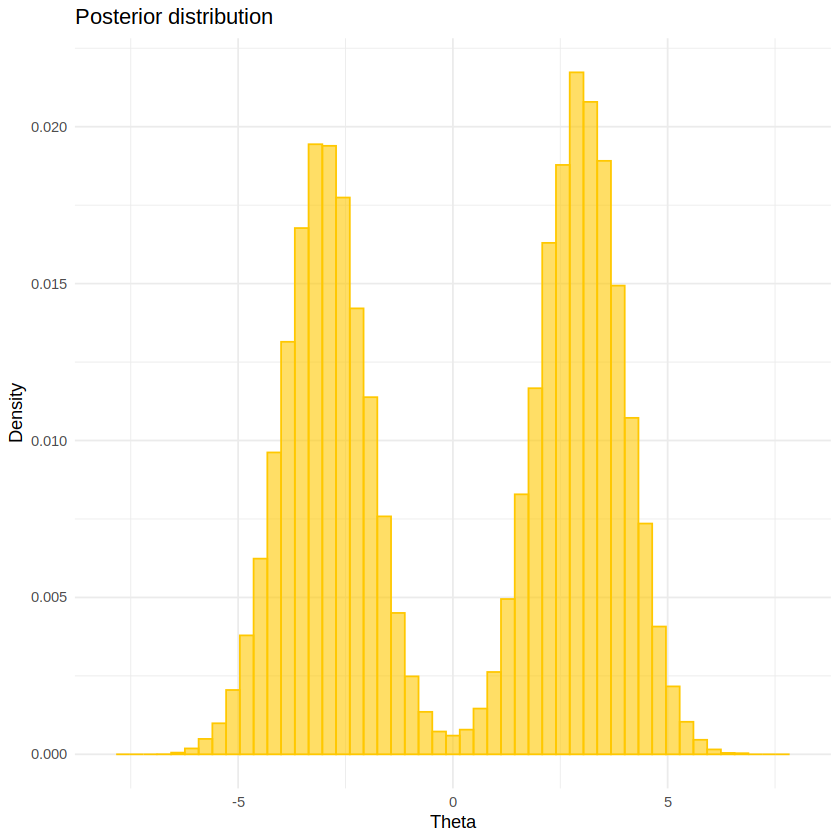

Normalized effective size = 0.003532747 
#################################

Running with burn_in = 1000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


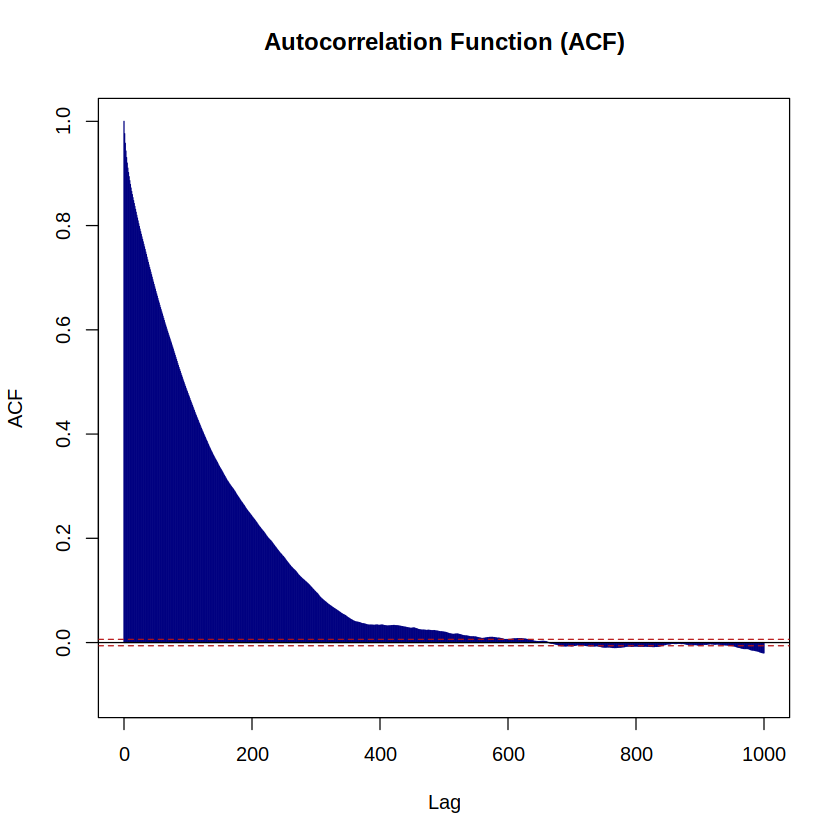

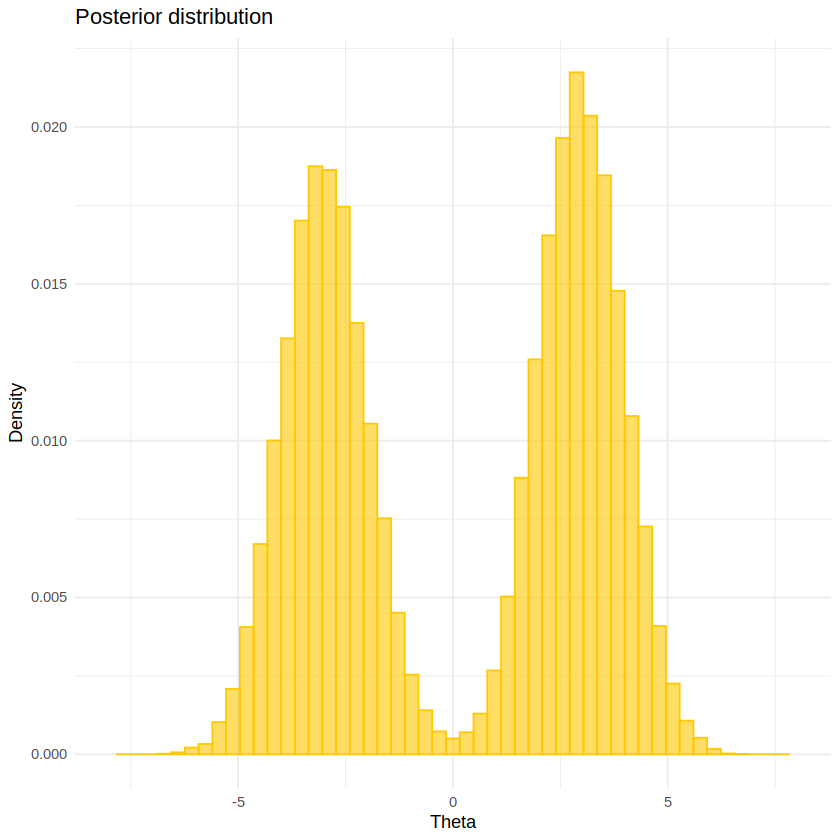

Normalized effective size = 0.0164734 
#################################

Running with burn_in = 1000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


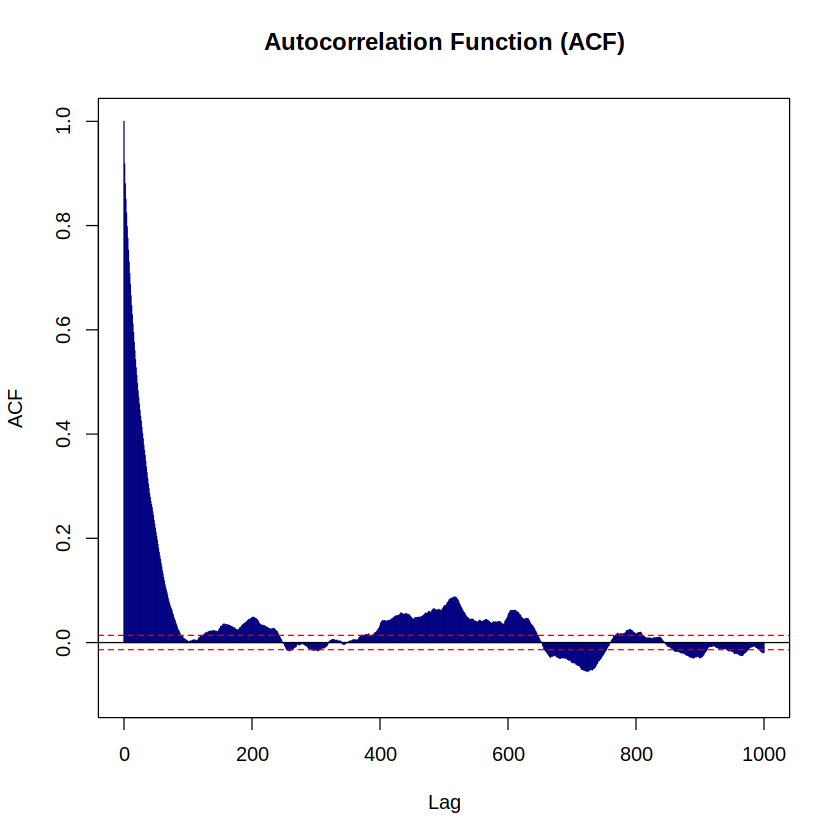

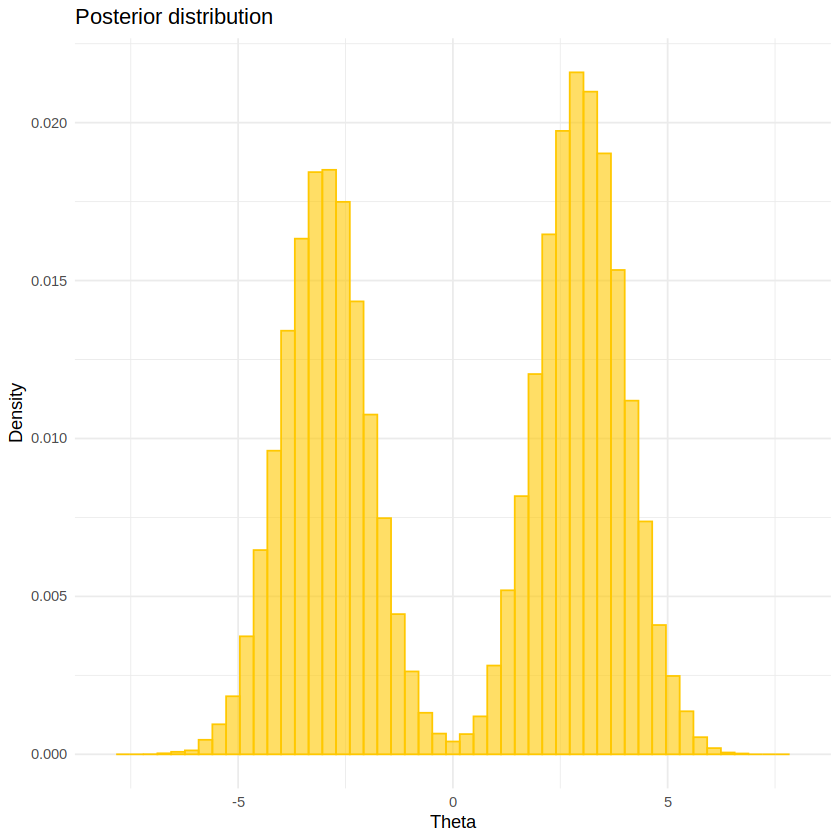

Normalized effective size = 0.03706524 
#################################

Running with burn_in = 1000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


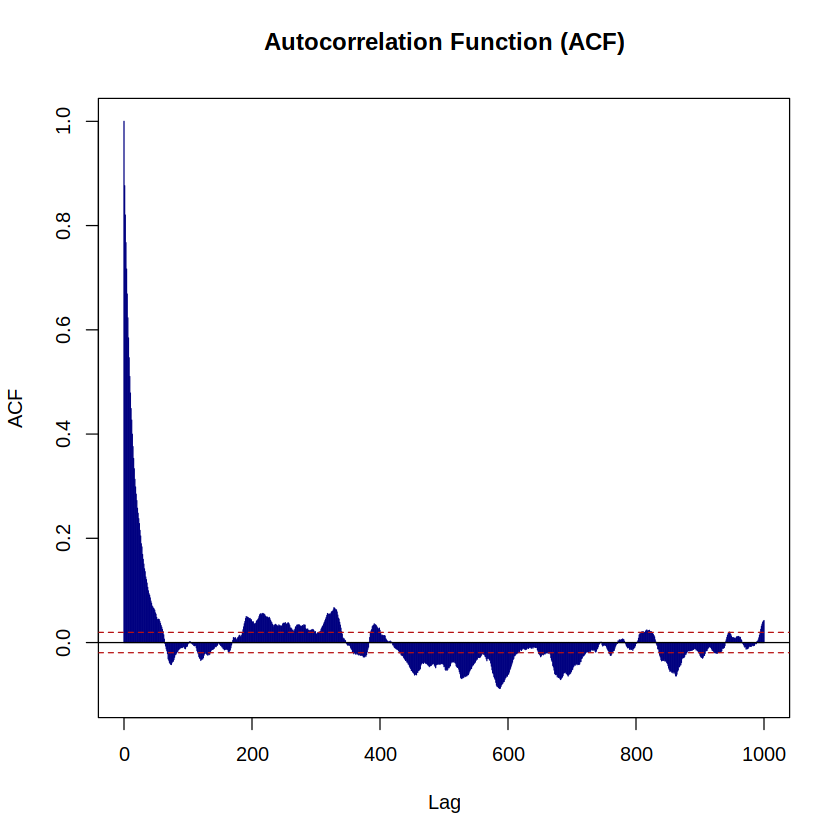

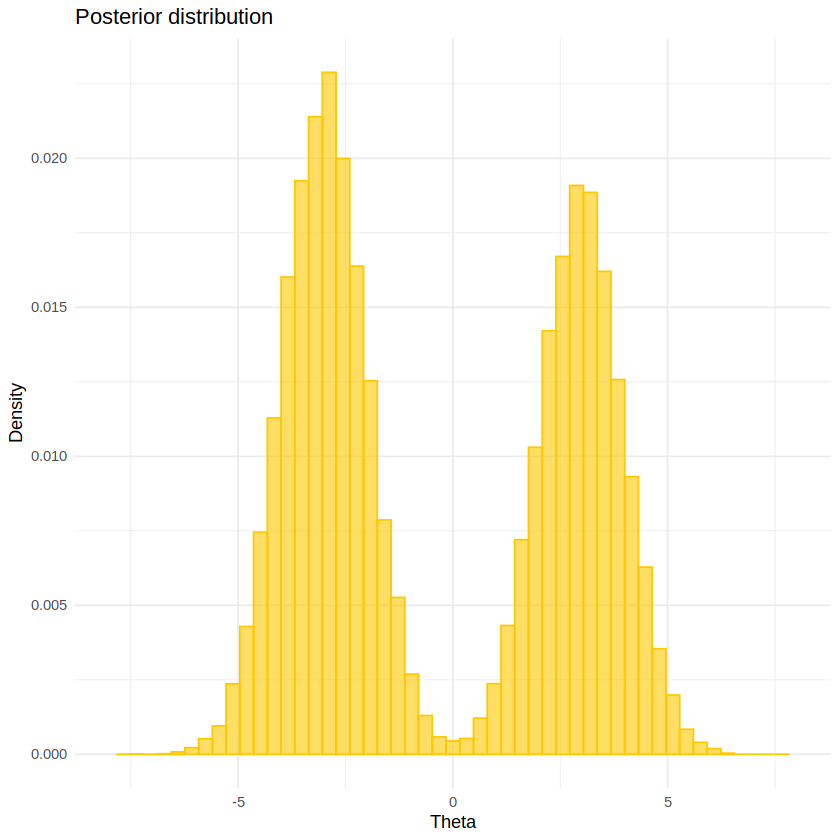

Normalized effective size = 0.04660298 
#################################

Running with burn_in = 1000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


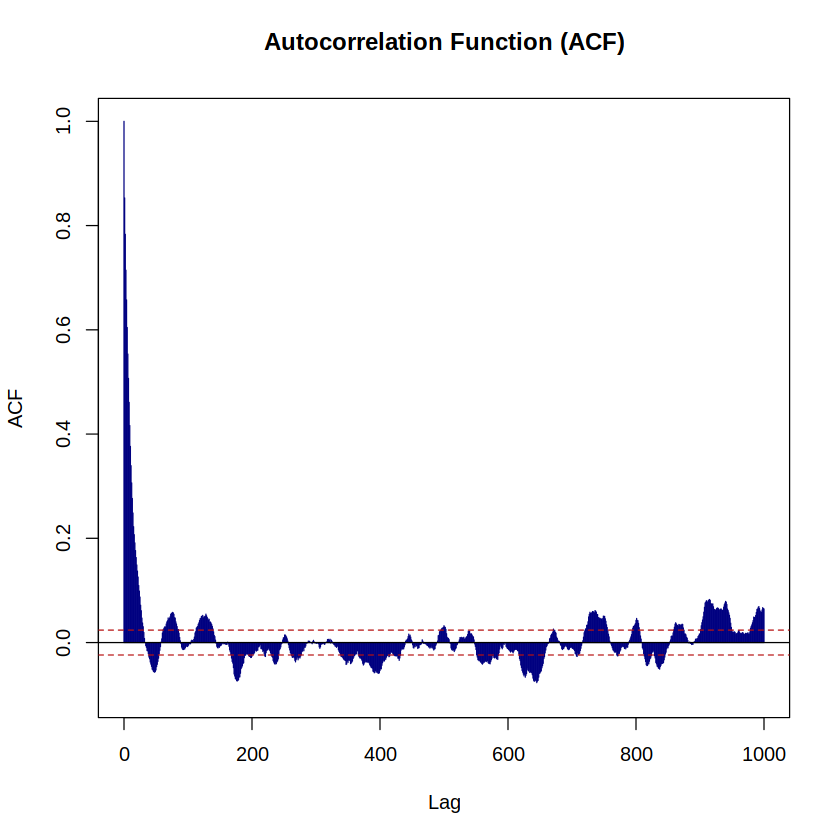

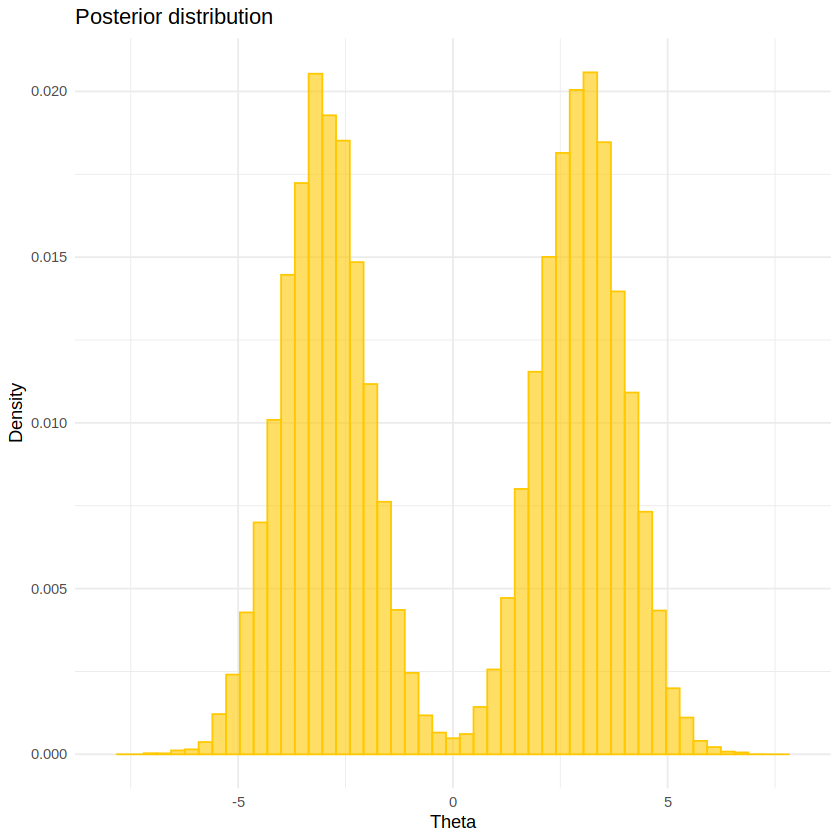

Normalized effective size = 0.06138572 
#################################

Running with burn_in = 5000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


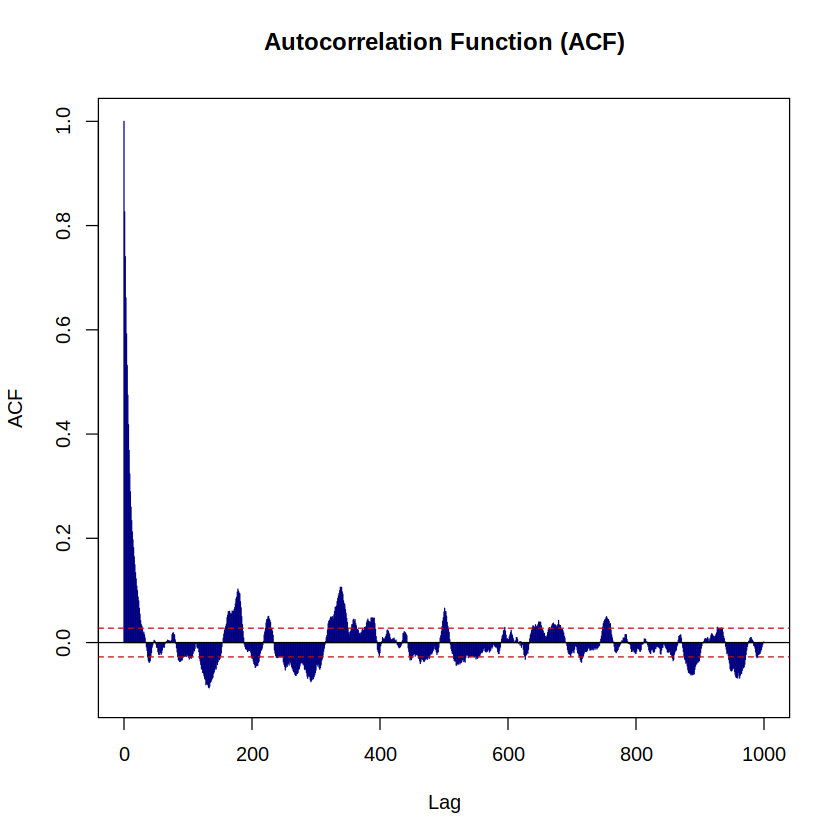

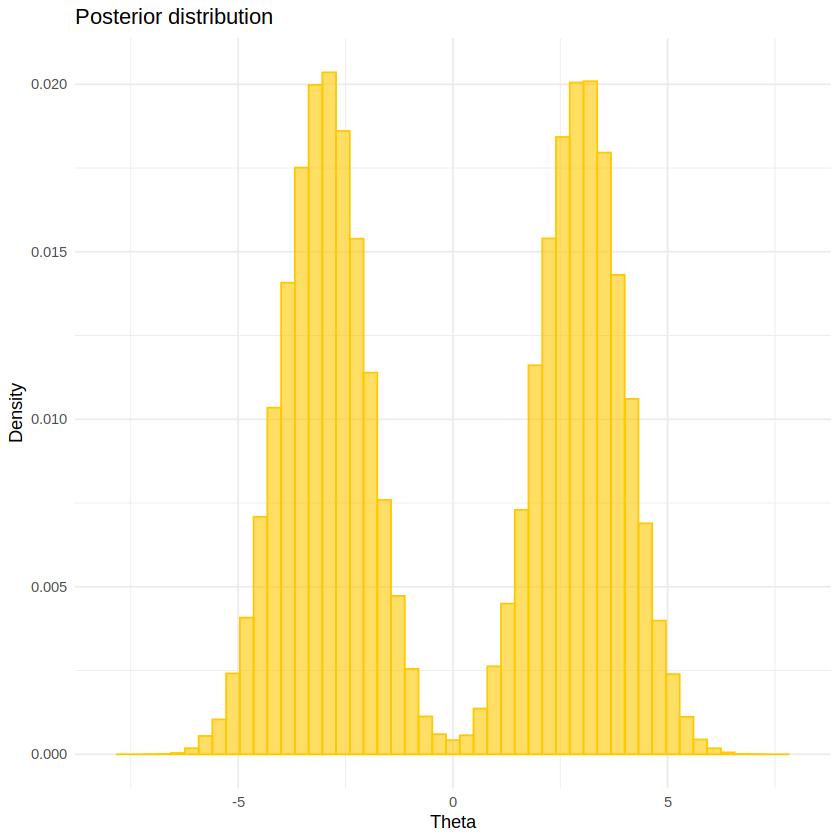

Normalized effective size = 0.003545225 
#################################

Running with burn_in = 5000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


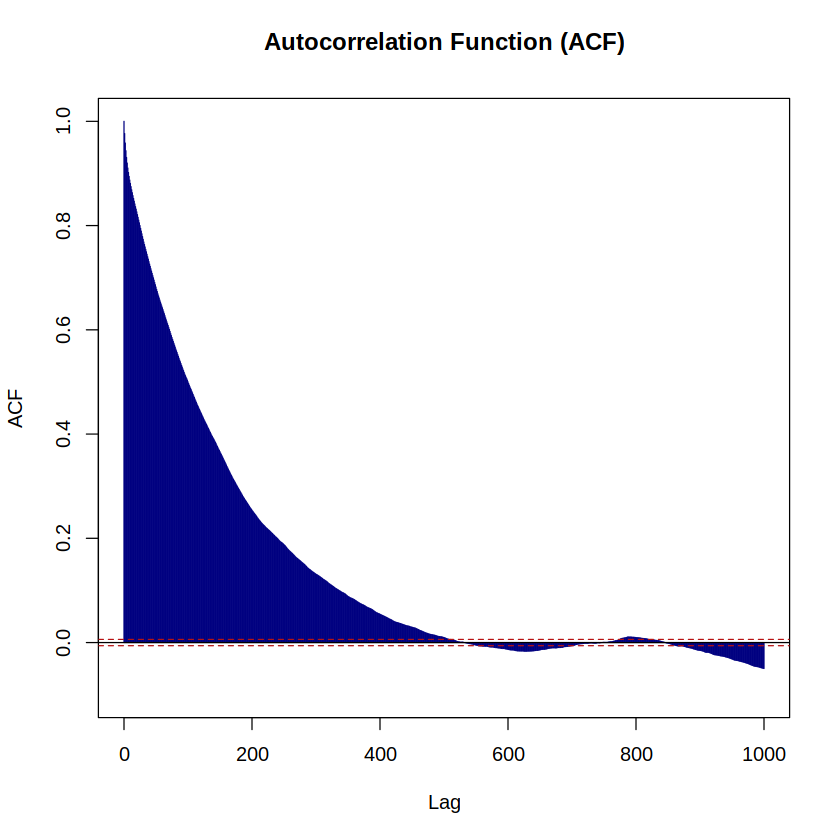

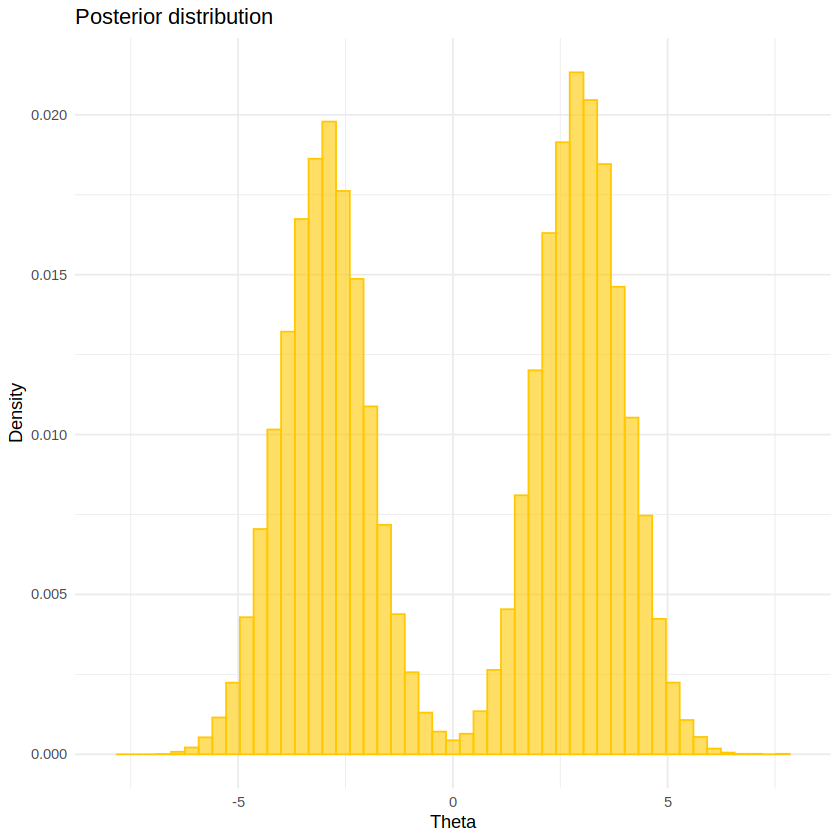

Normalized effective size = 0.01815381 
#################################

Running with burn_in = 5000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


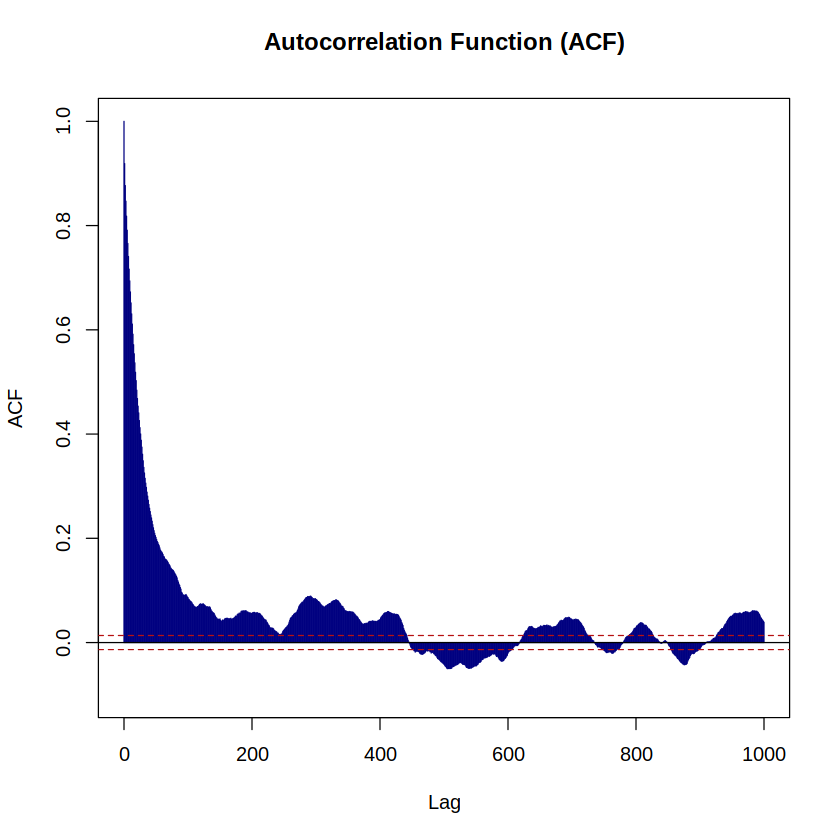

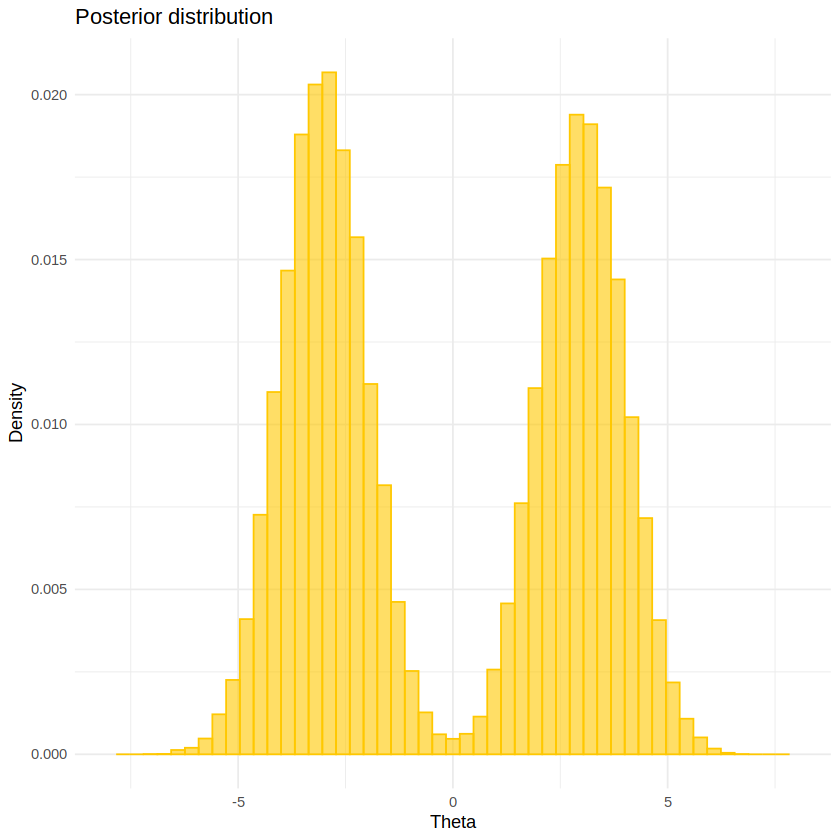

Normalized effective size = 0.0335824 
#################################

Running with burn_in = 5000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


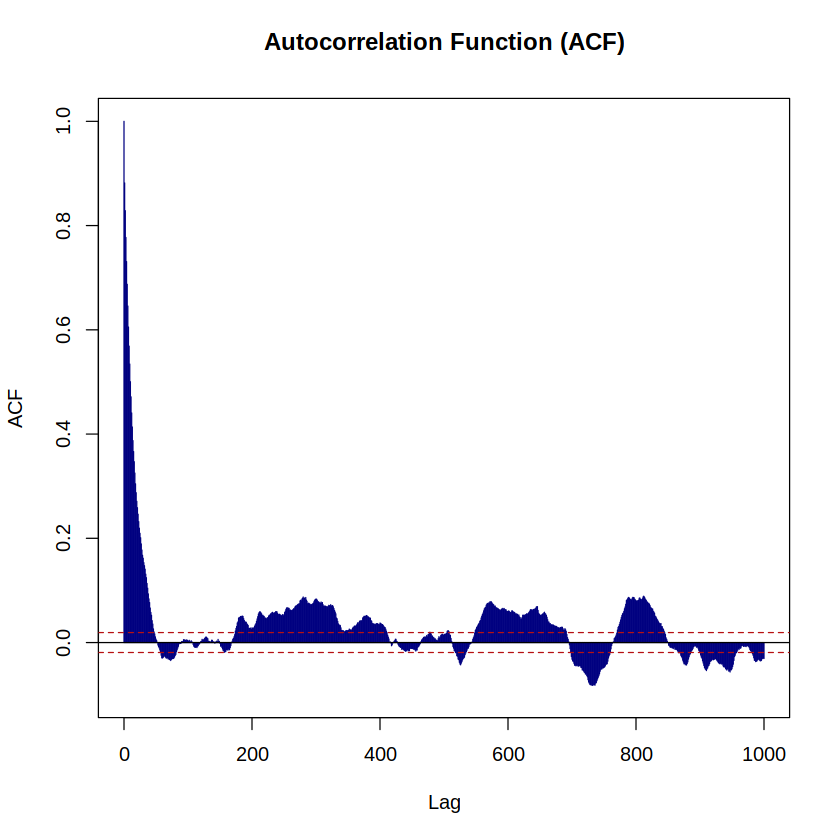

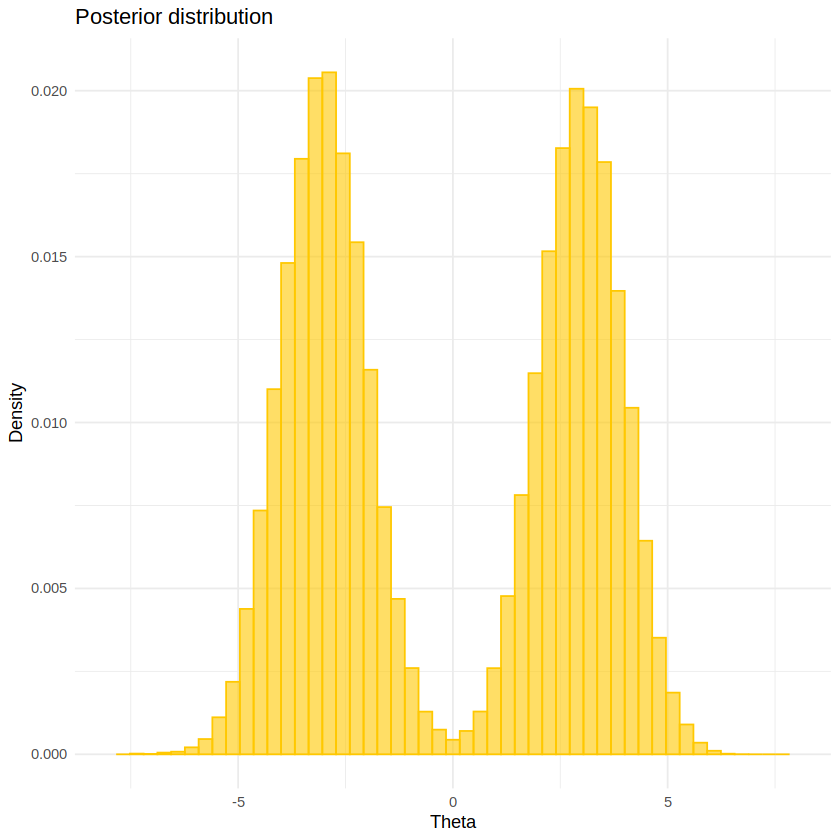

Normalized effective size = 0.04929407 
#################################

Running with burn_in = 5000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


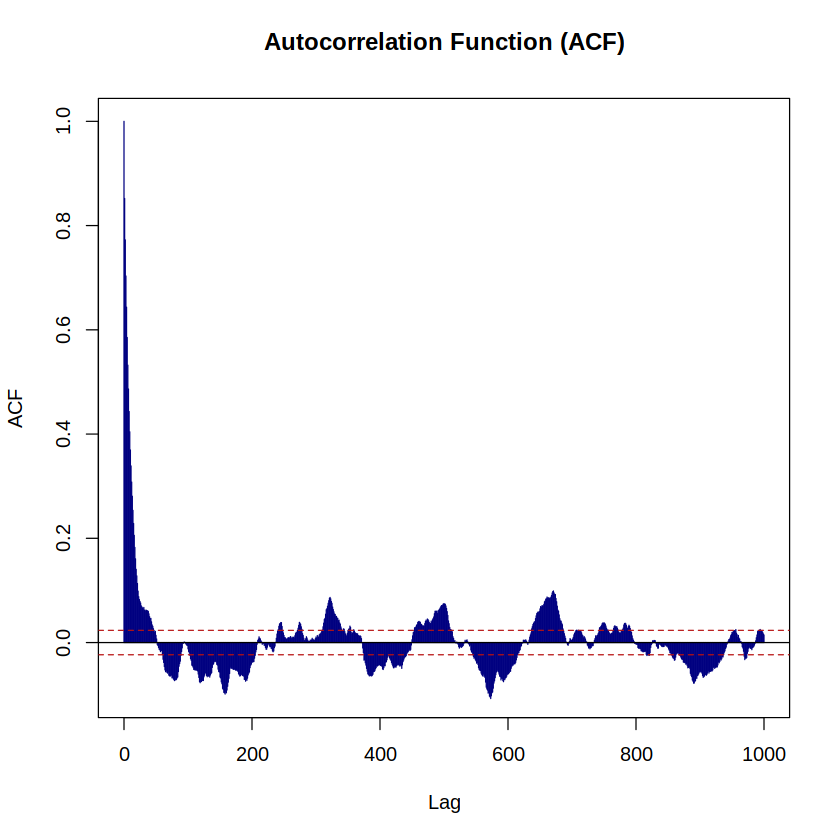

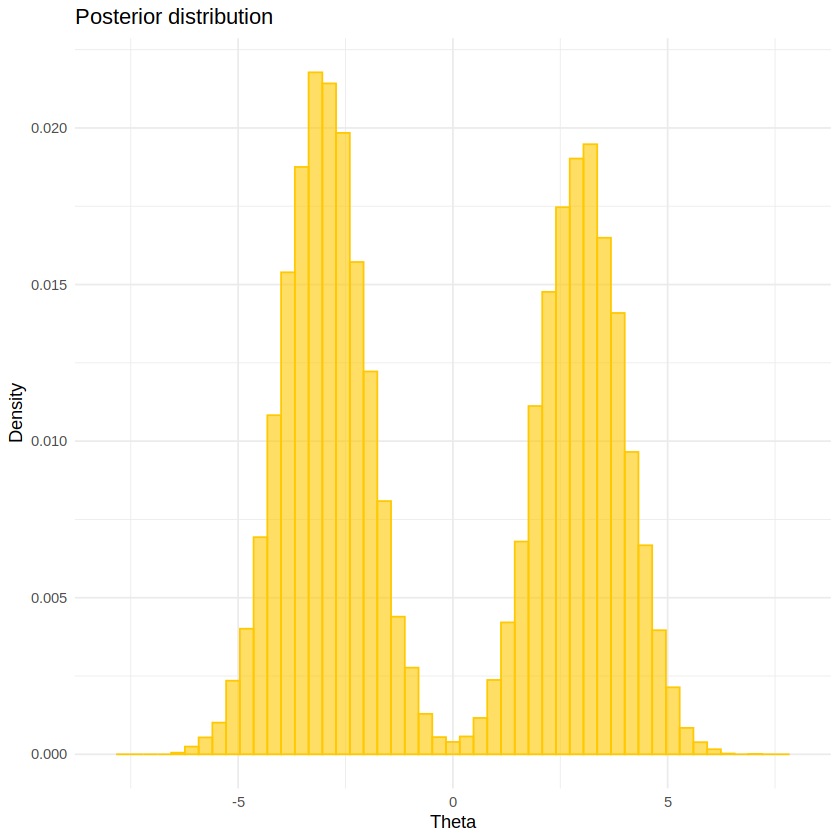

Normalized effective size = 0.0630138 
#################################

Running with burn_in = 10000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


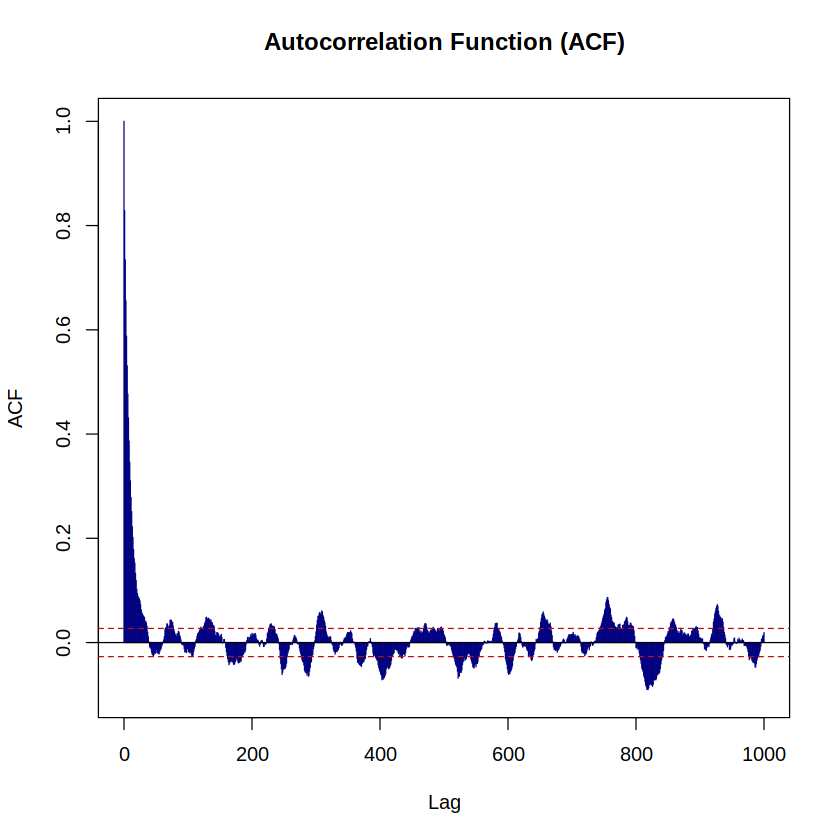

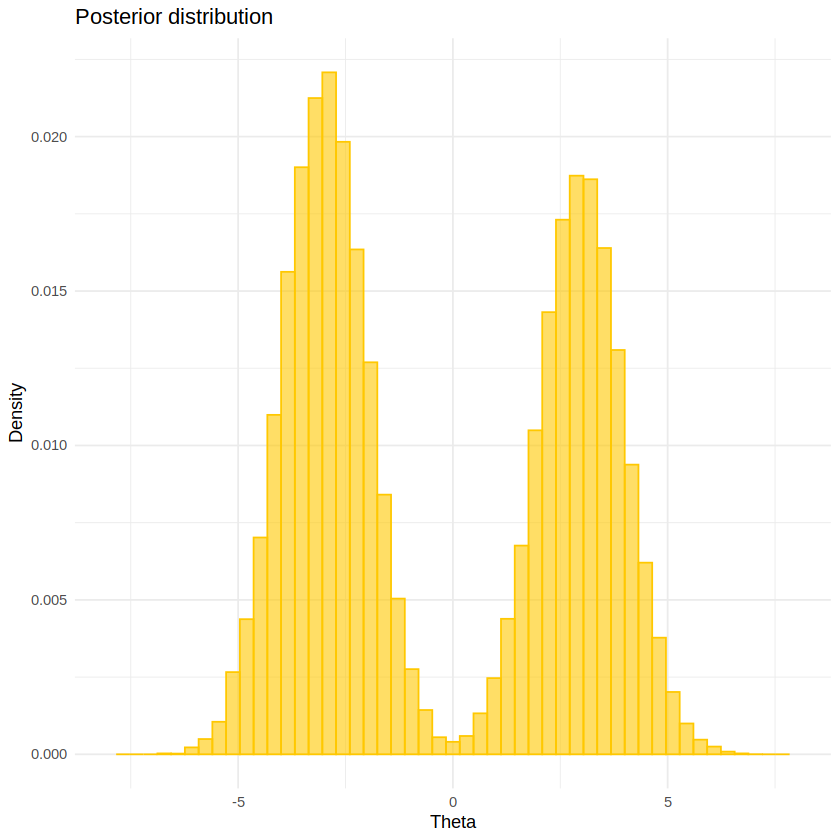

Normalized effective size = 0.003300238 
#################################

Running with burn_in = 10000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


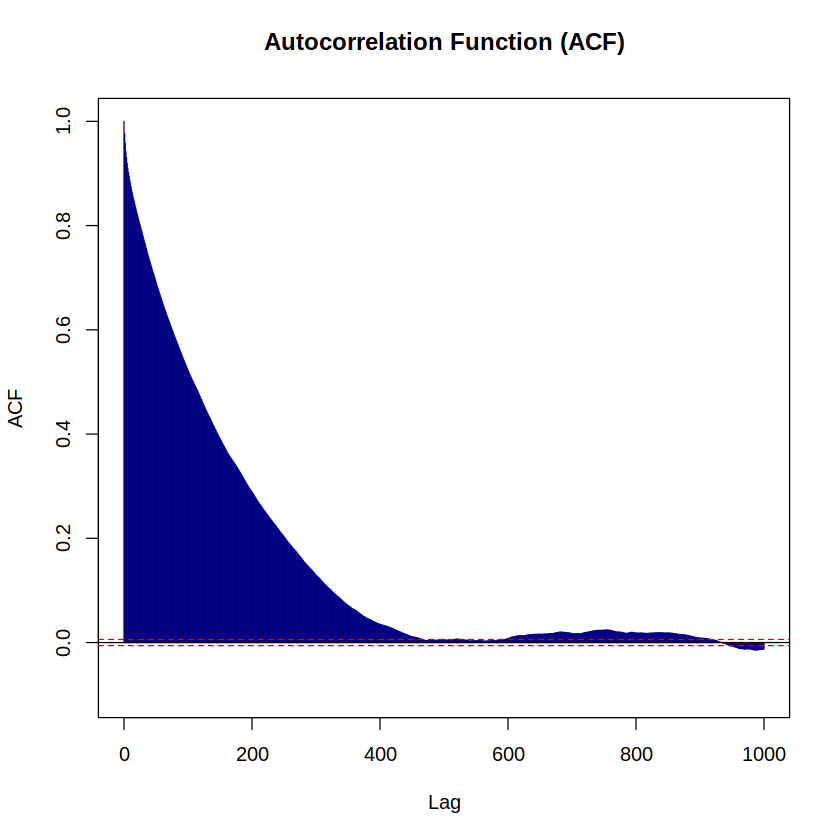

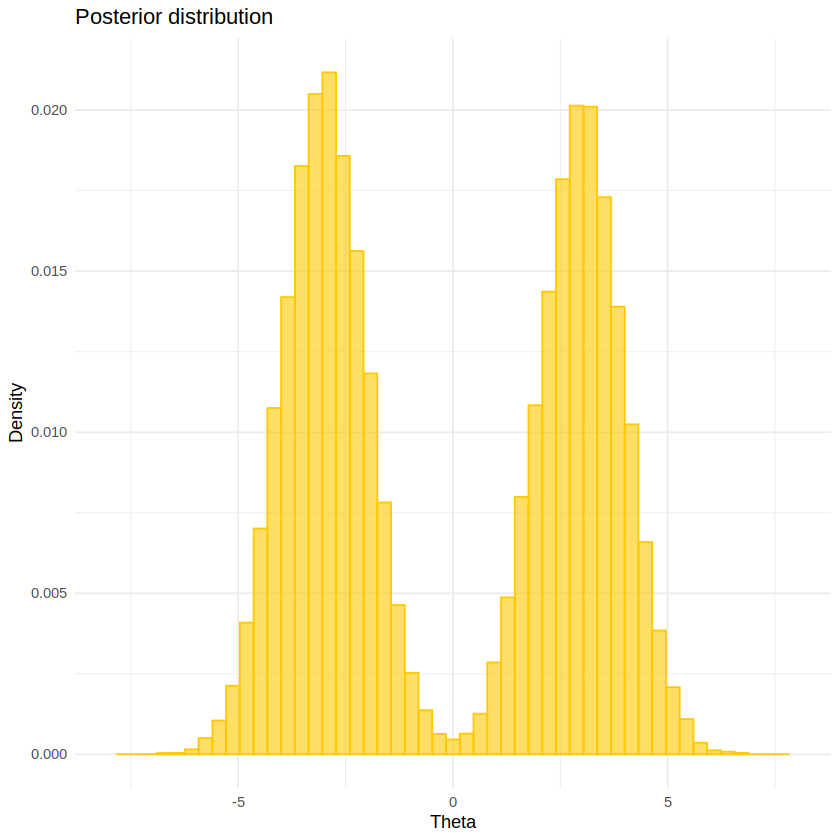

Normalized effective size = 0.01724833 
#################################

Running with burn_in = 10000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


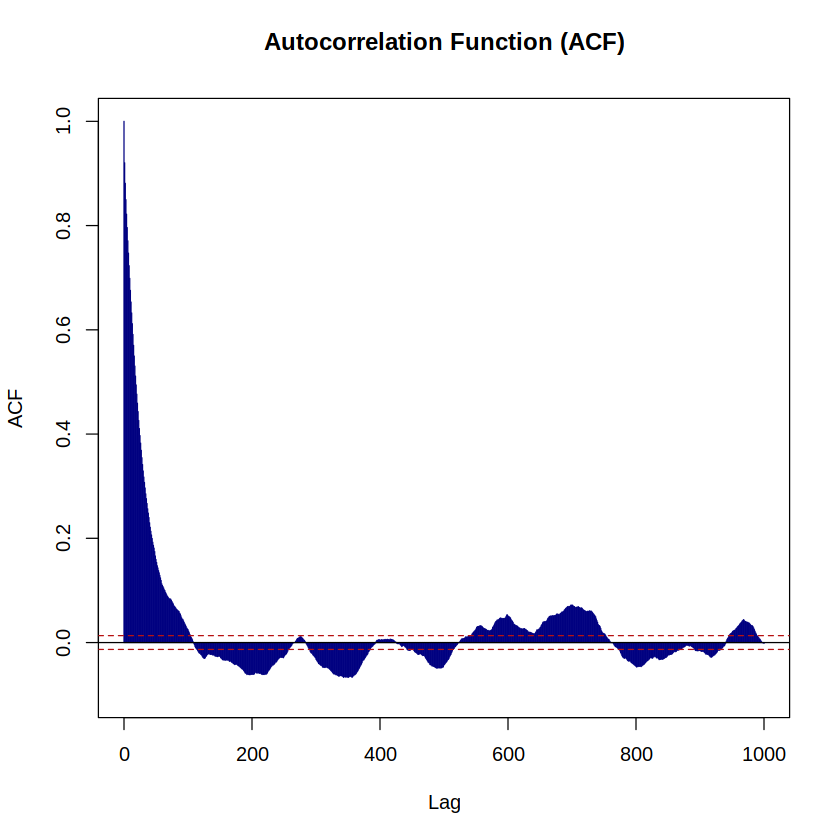

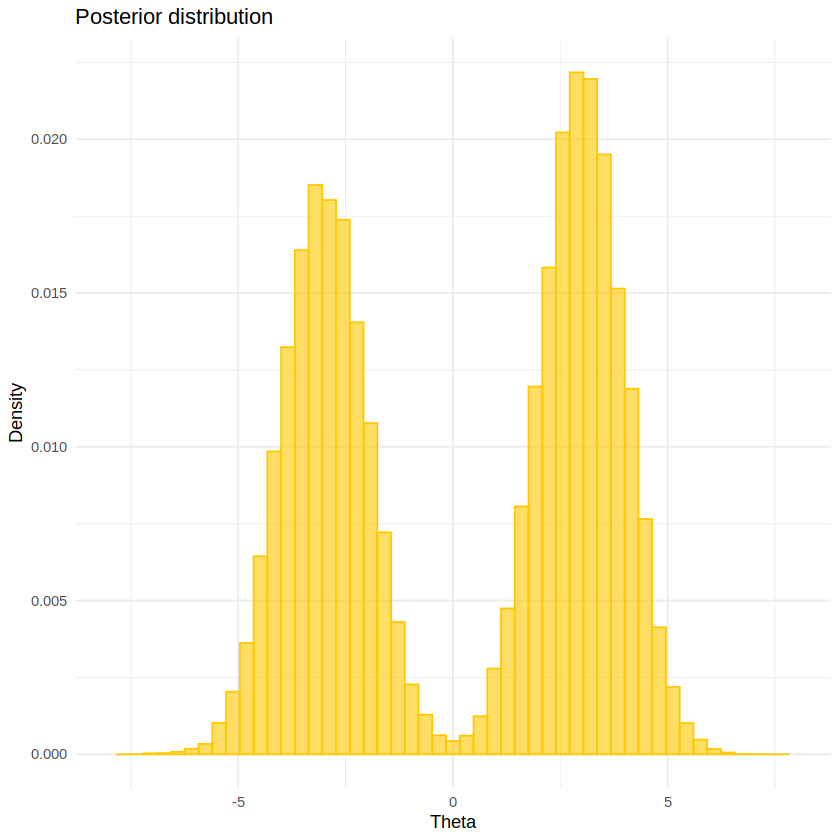

Normalized effective size = 0.03530545 
#################################

Running with burn_in = 10000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


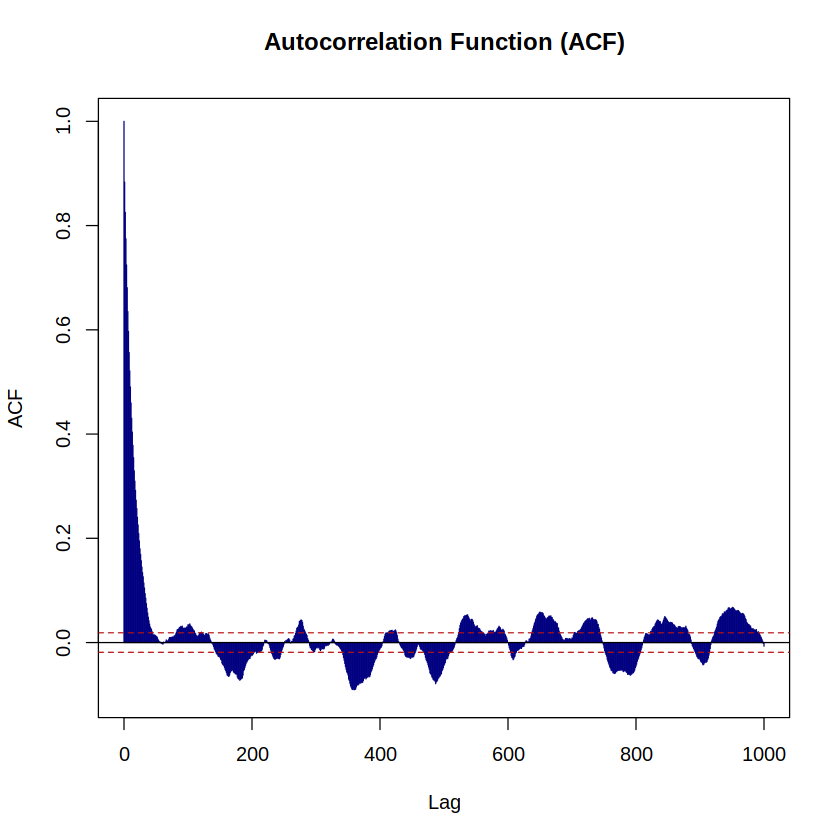

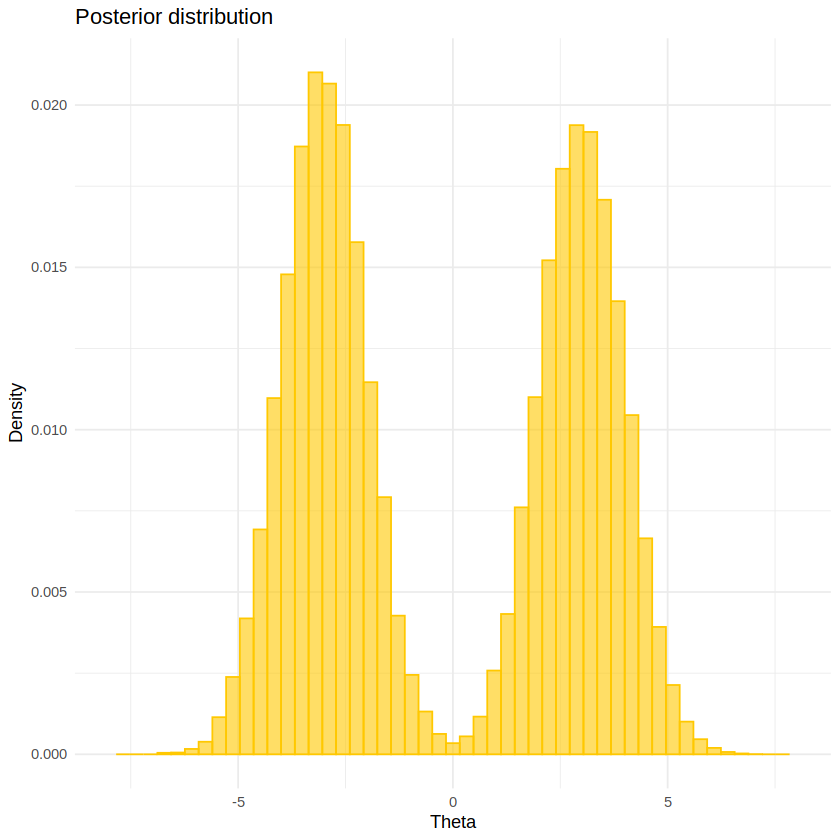

Normalized effective size = 0.05101788 
#################################

Running with burn_in = 10000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


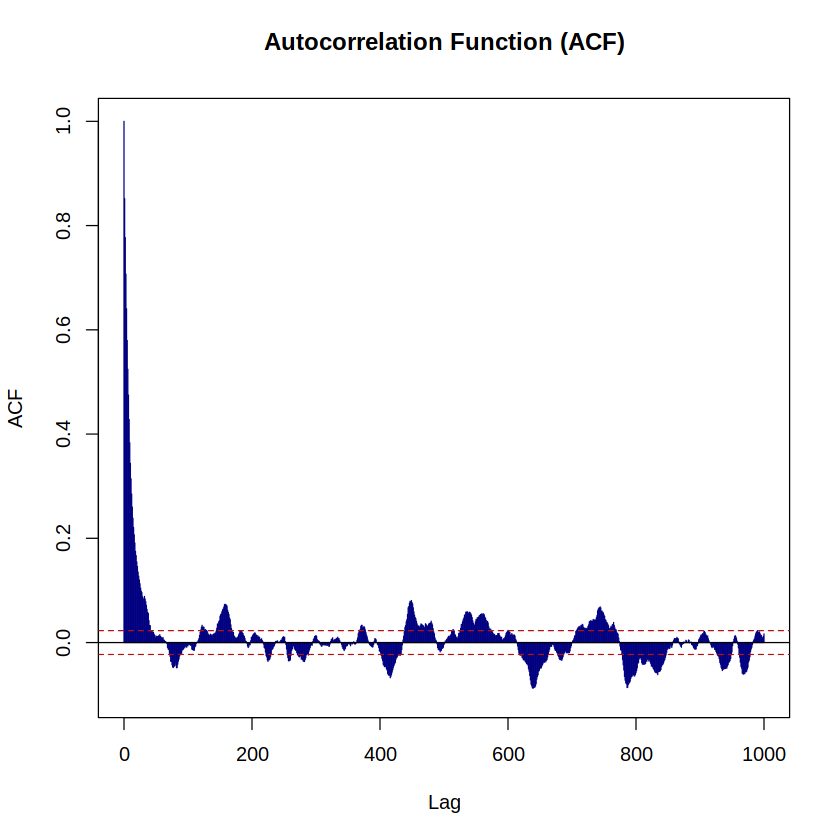

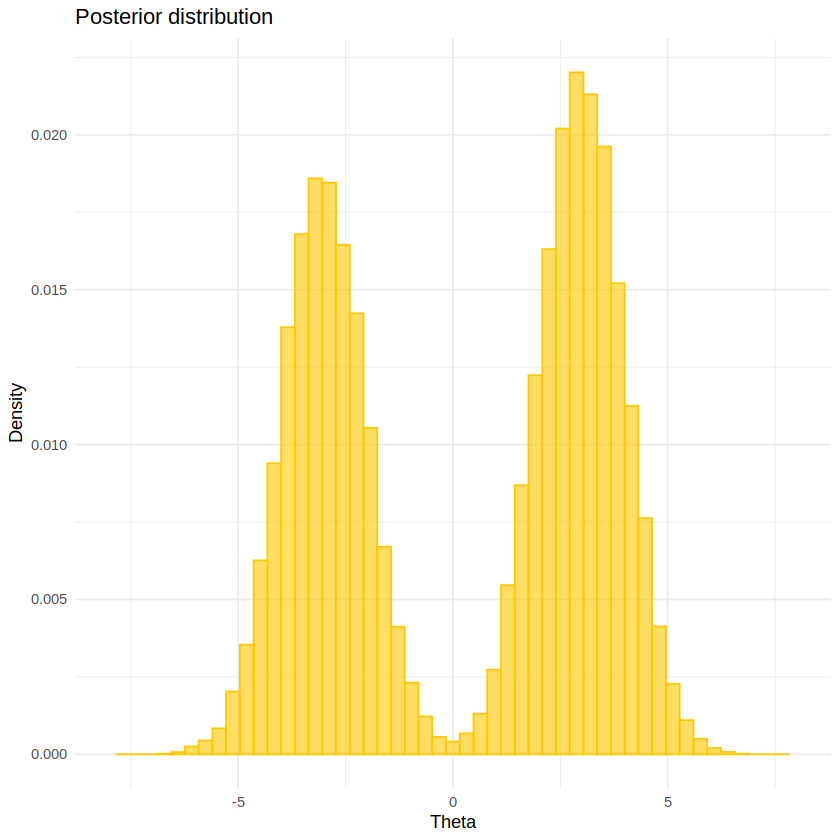

Normalized effective size = 0.0669878 
#################################

Running with burn_in = 20000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


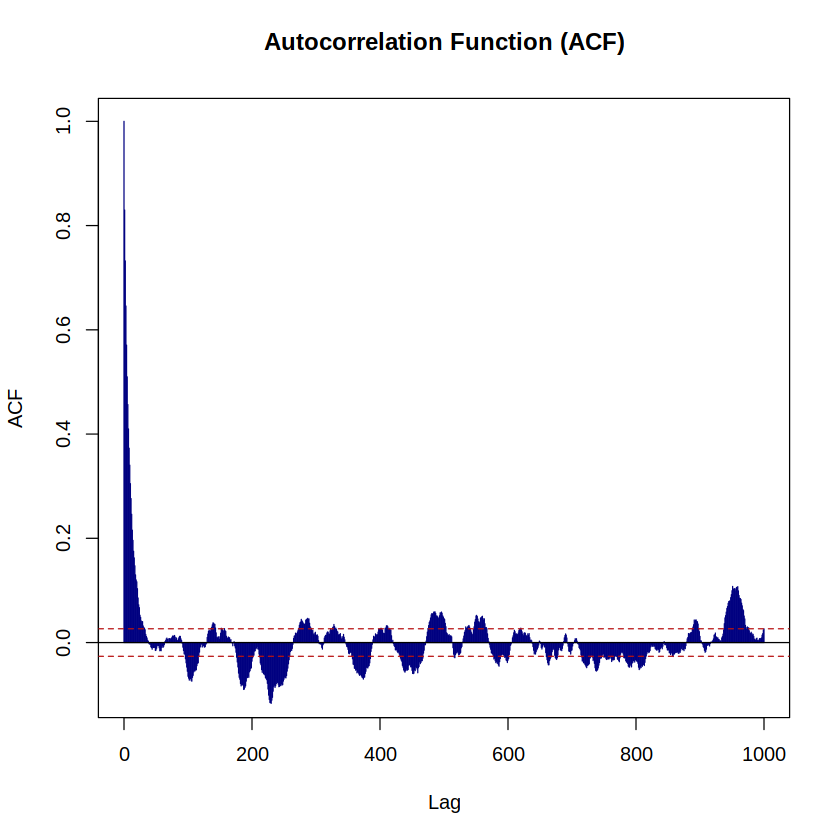

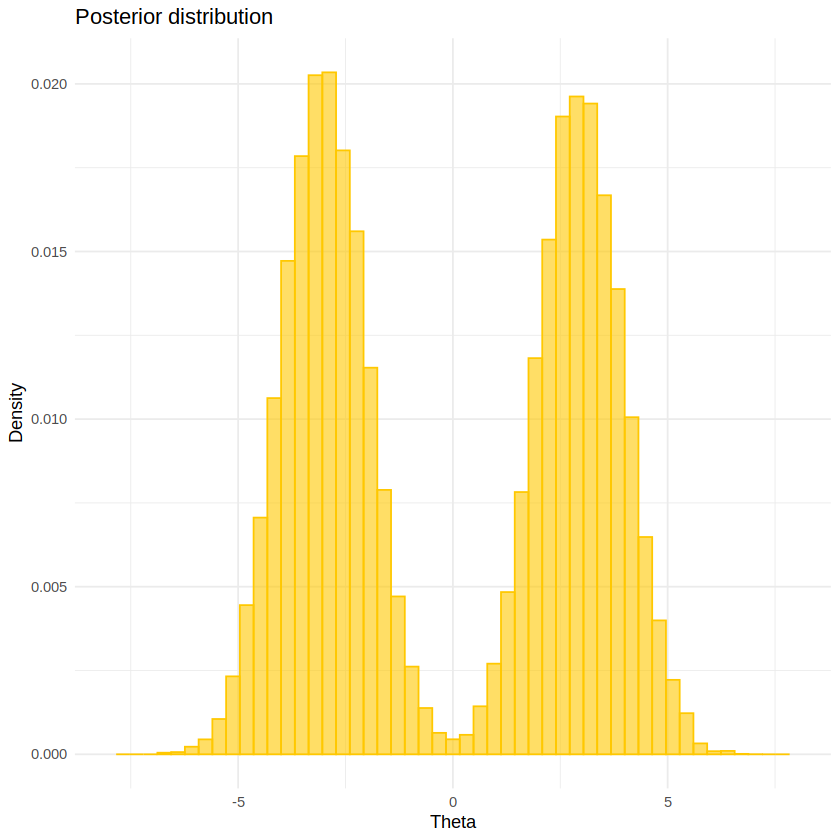

Normalized effective size = 0.003172624 
#################################

Running with burn_in = 20000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


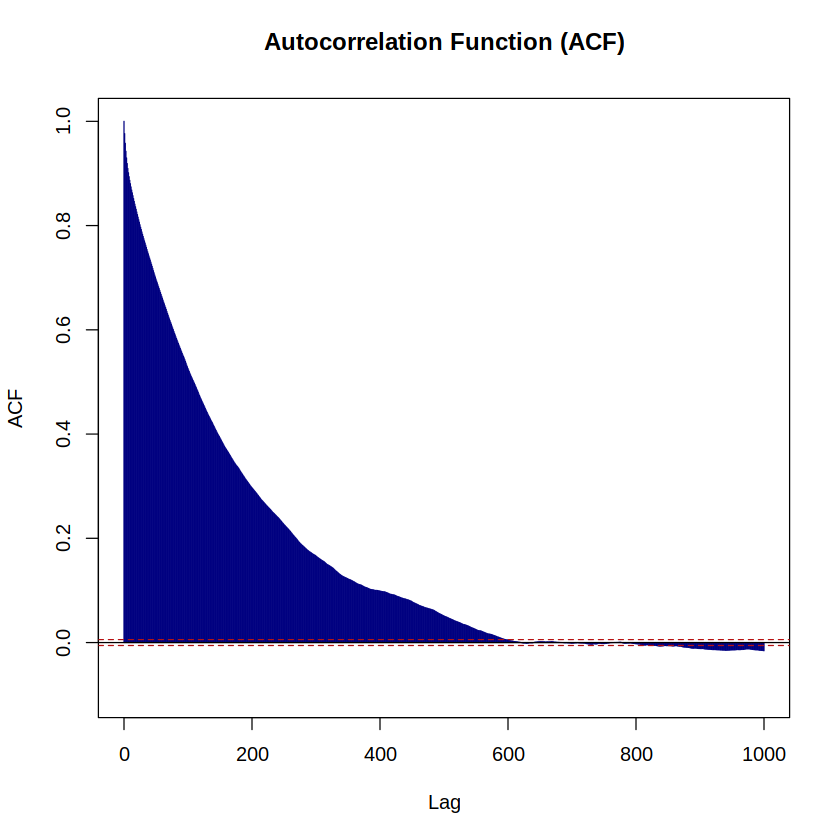

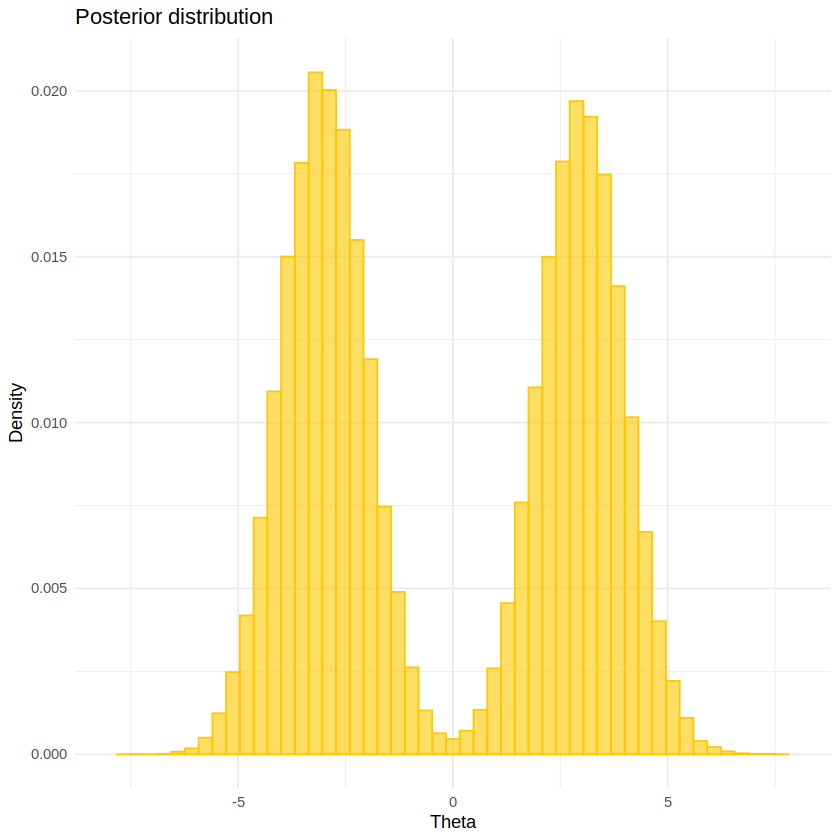

Normalized effective size = 0.01768614 
#################################

Running with burn_in = 20000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


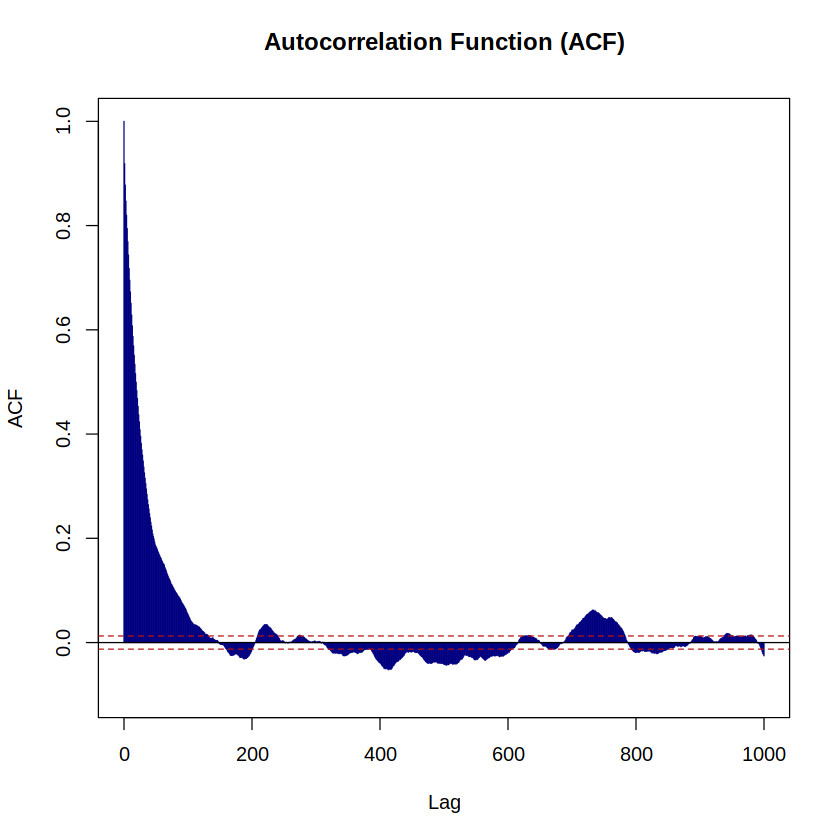

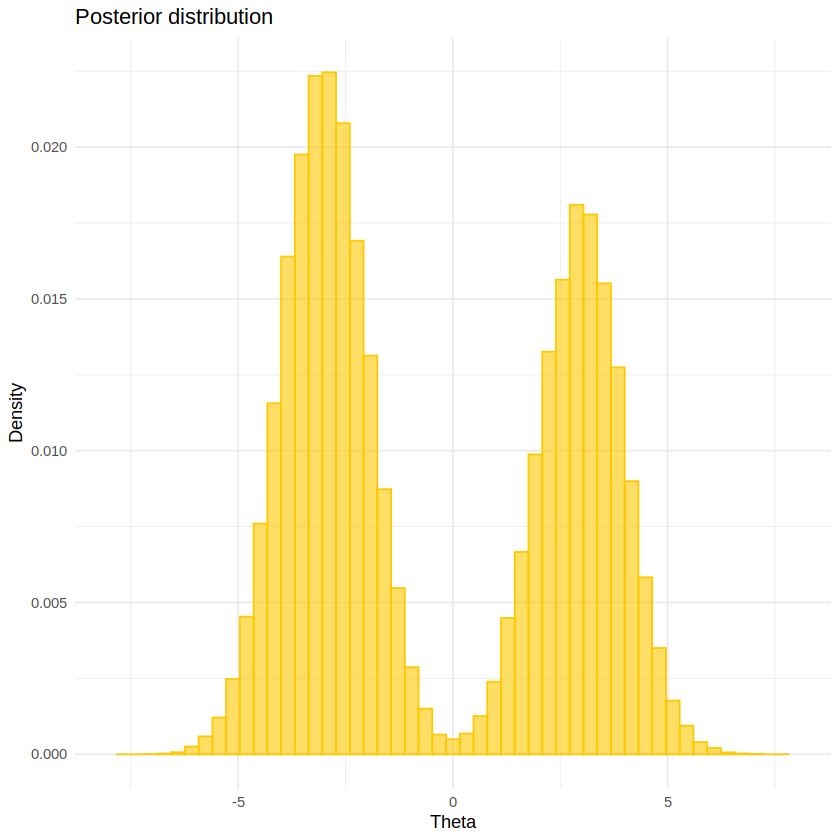

Normalized effective size = 0.03531503 
#################################

Running with burn_in = 20000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


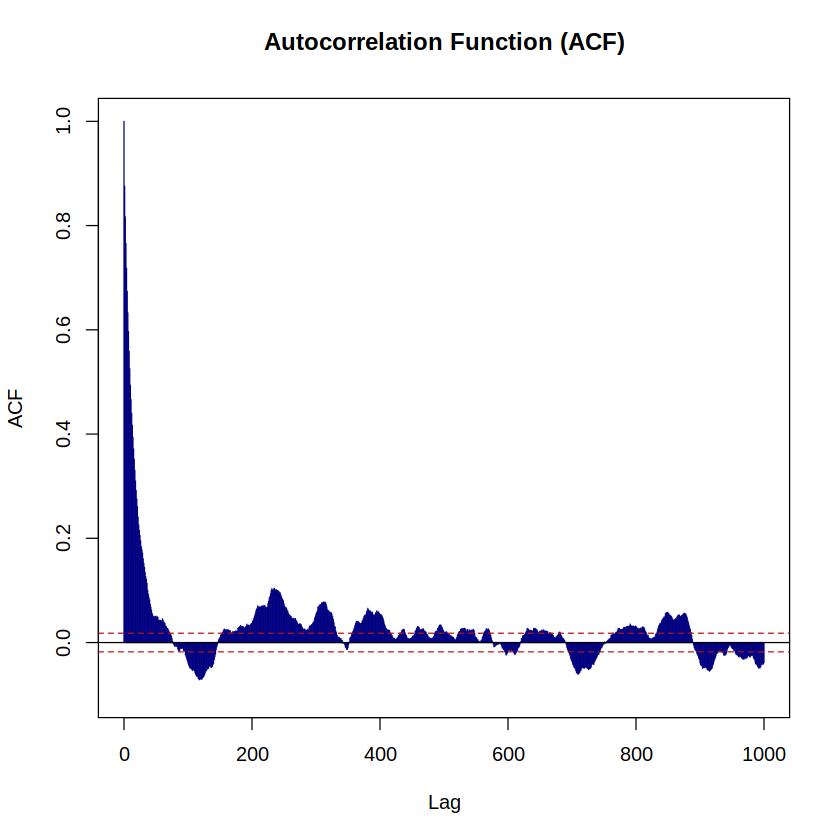

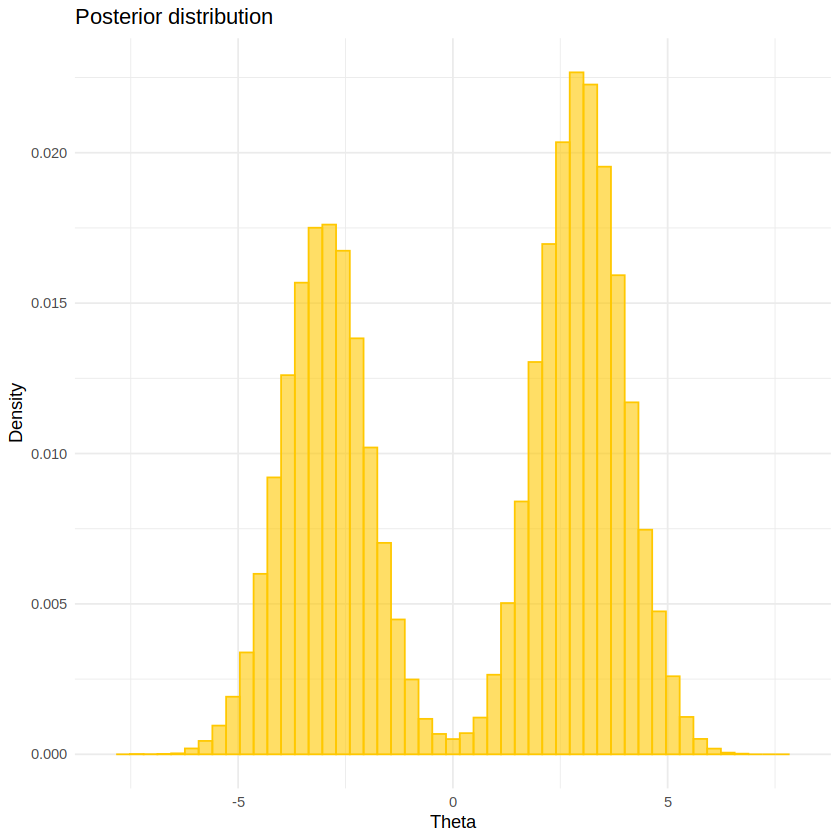

Normalized effective size = 0.05051101 
#################################

Running with burn_in = 20000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


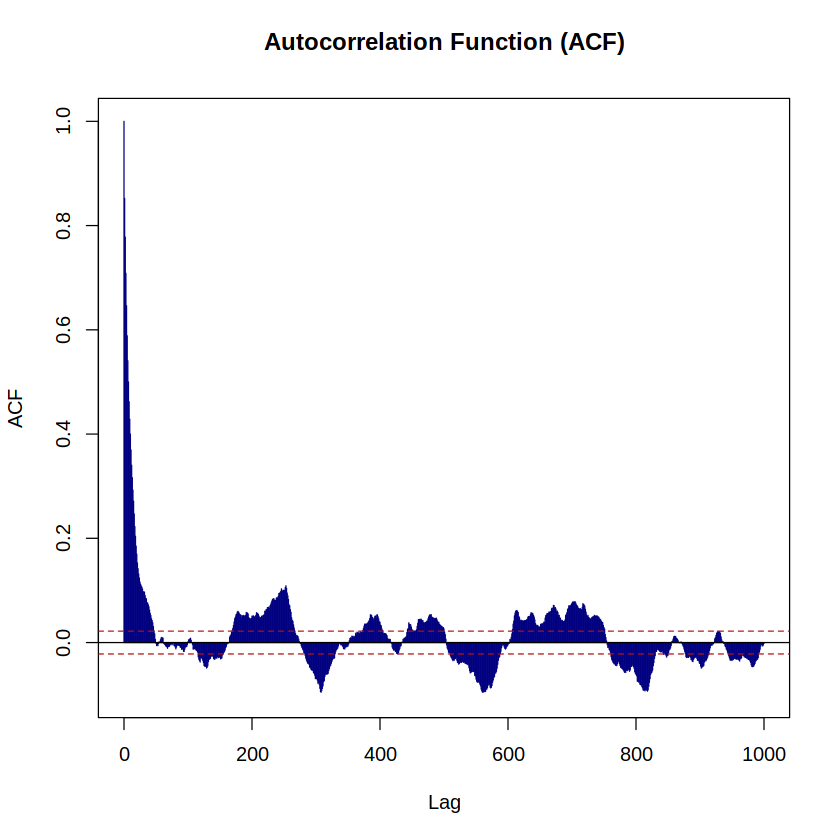

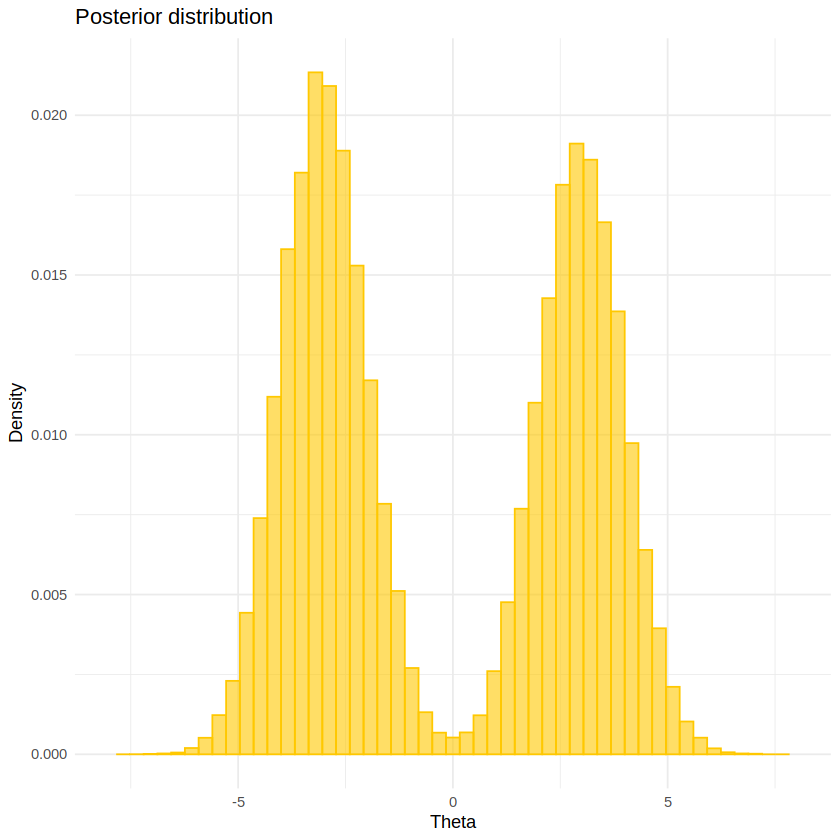

Normalized effective size = 0.06412143 
#################################

Running with burn_in = 30000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


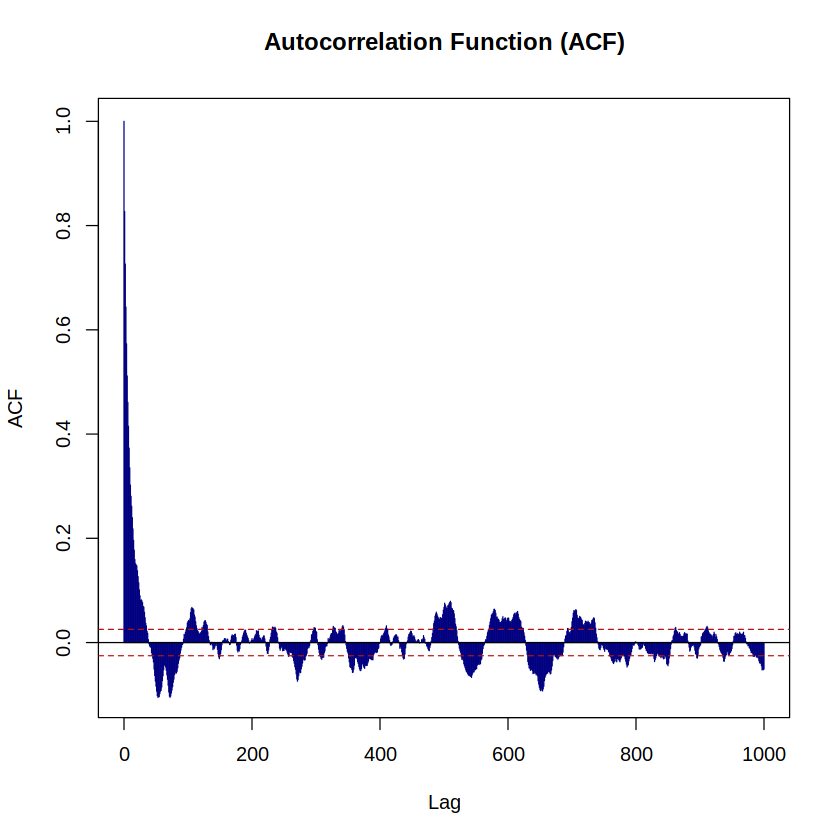

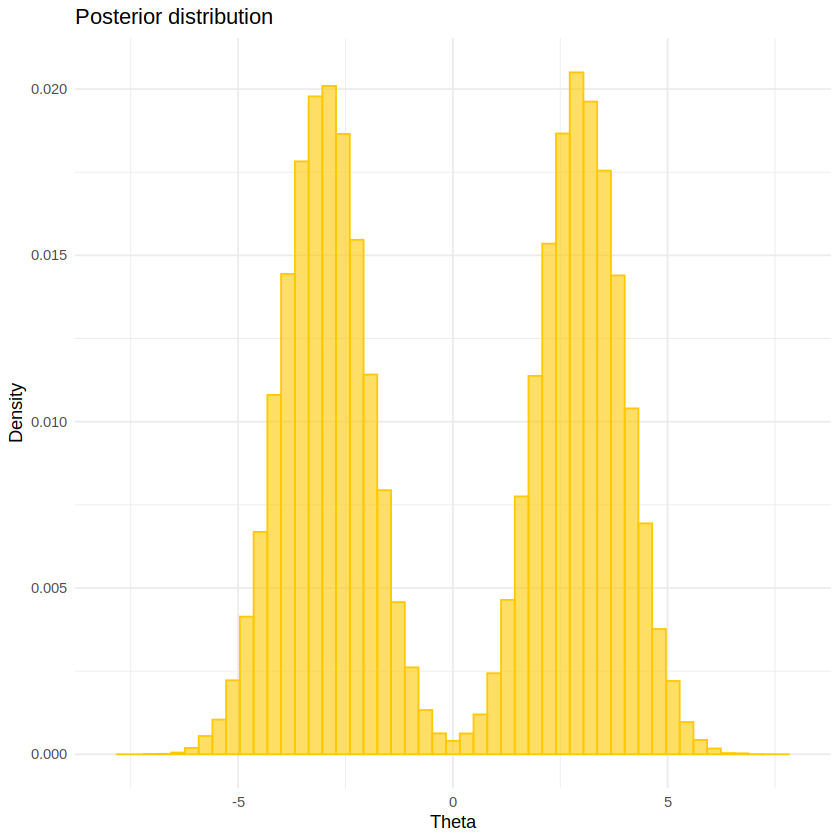

Normalized effective size = 0.003401022 
#################################

Running with burn_in = 30000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


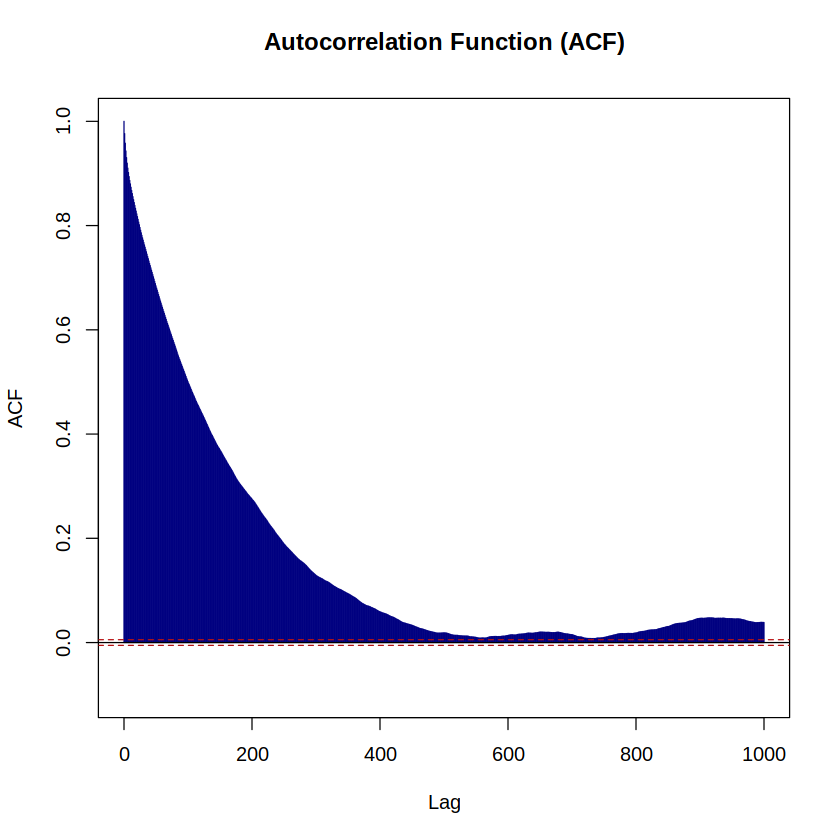

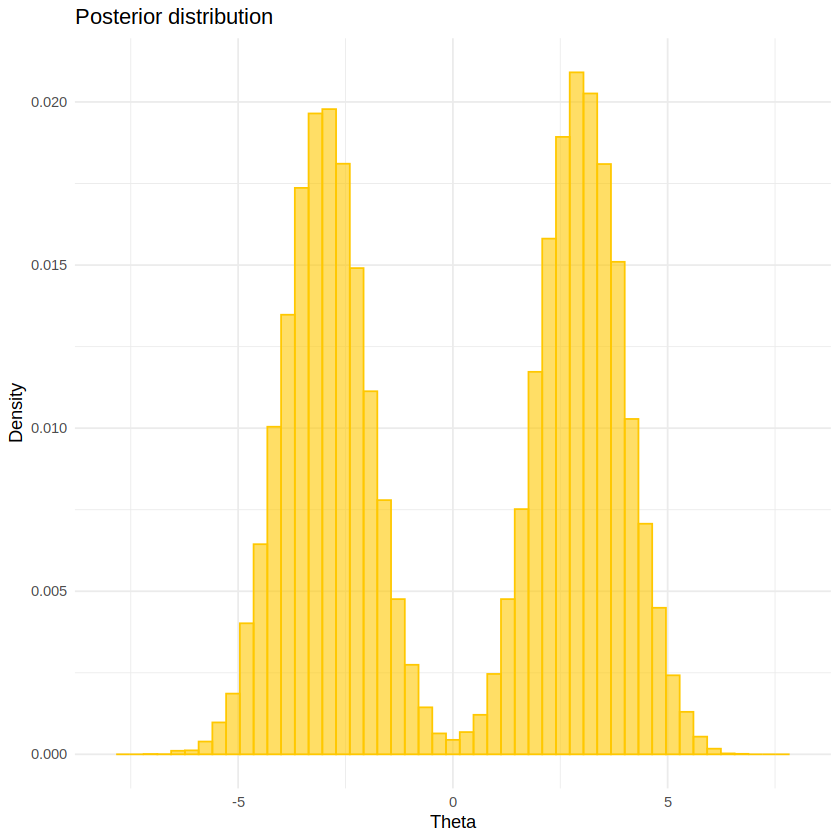

Normalized effective size = 0.01647772 
#################################

Running with burn_in = 30000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


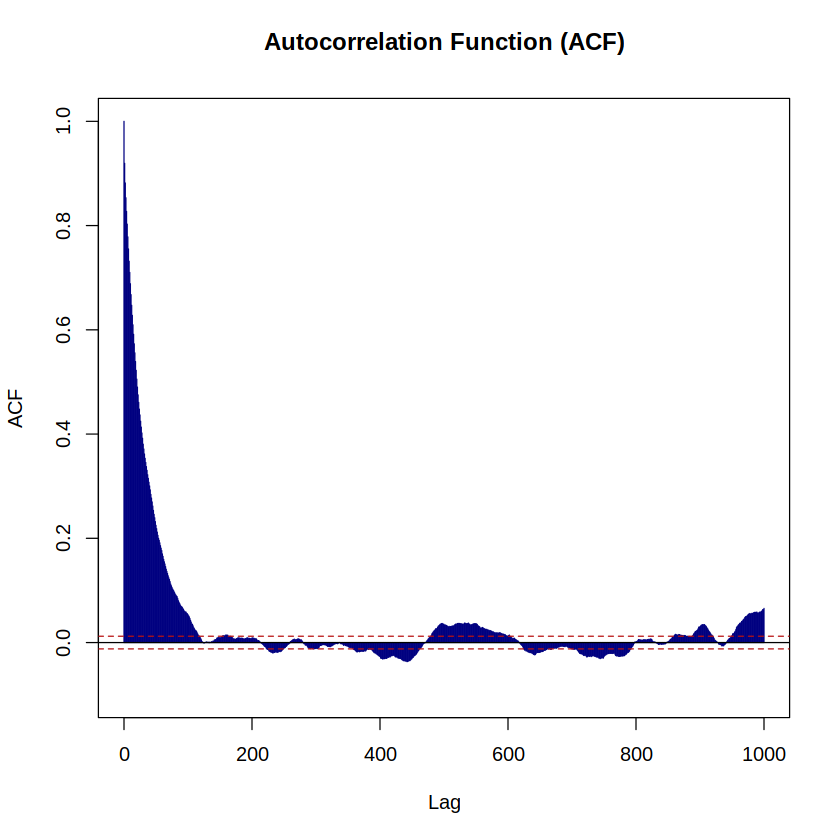

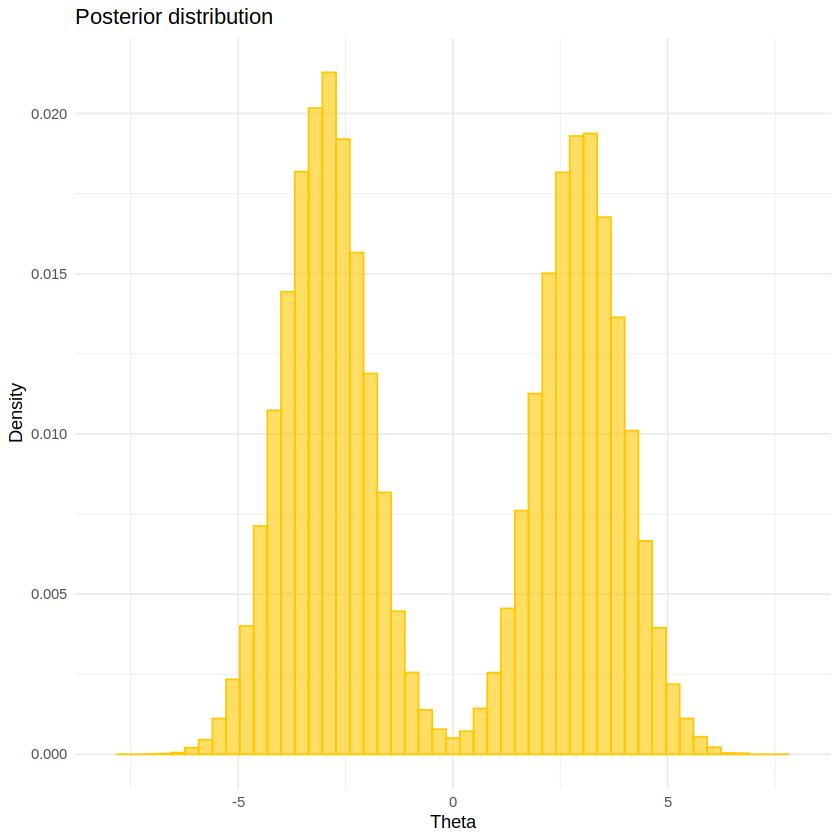

Normalized effective size = 0.03281895 
#################################

Running with burn_in = 30000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


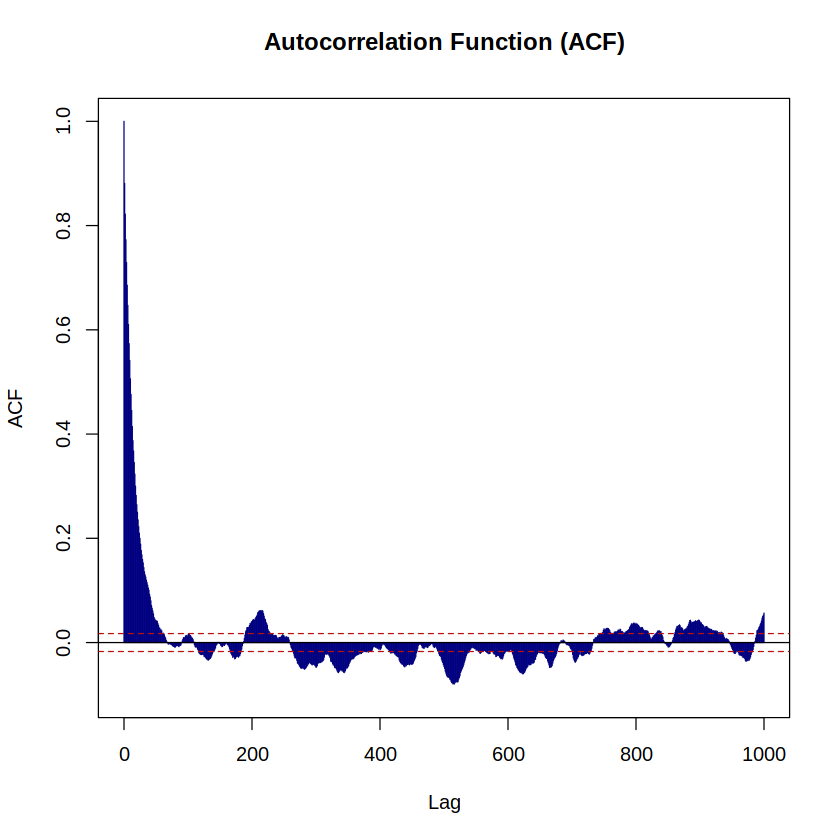

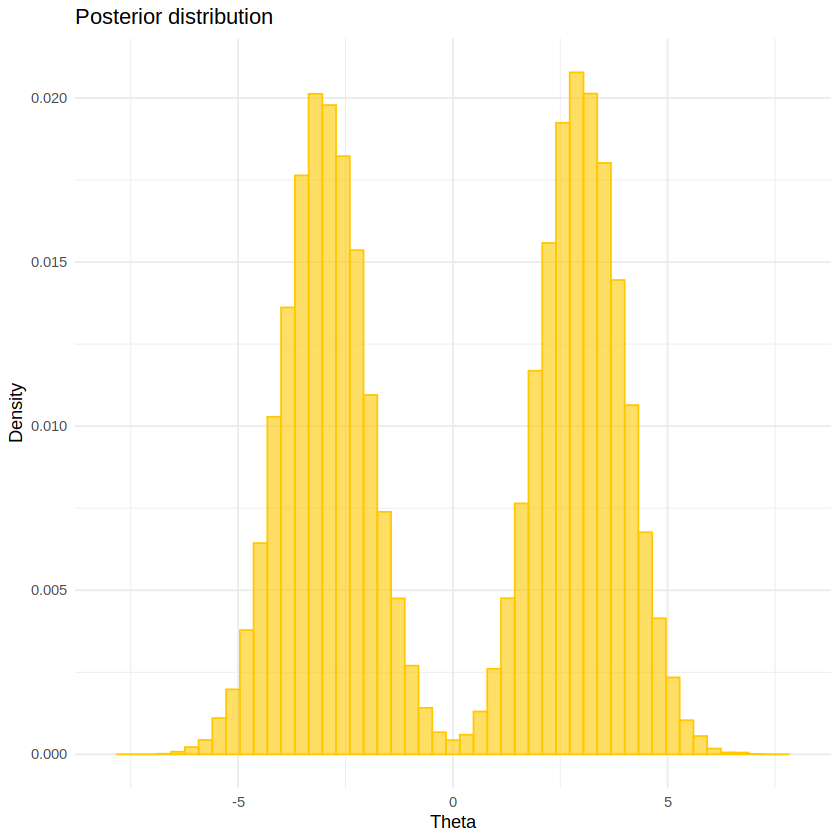

Normalized effective size = 0.05286759 
#################################

Running with burn_in = 30000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


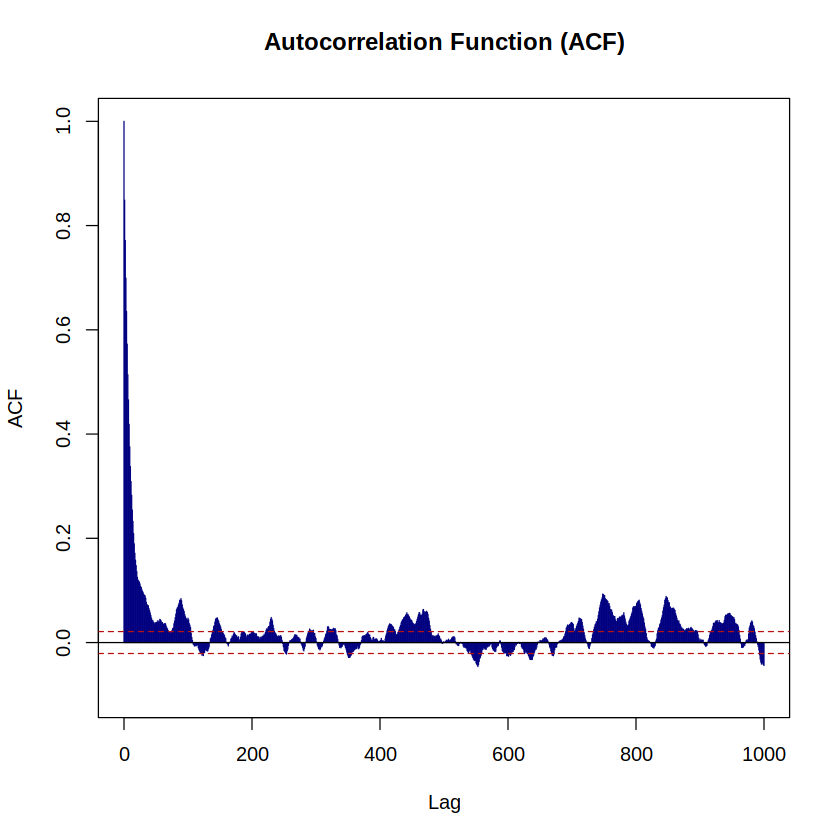

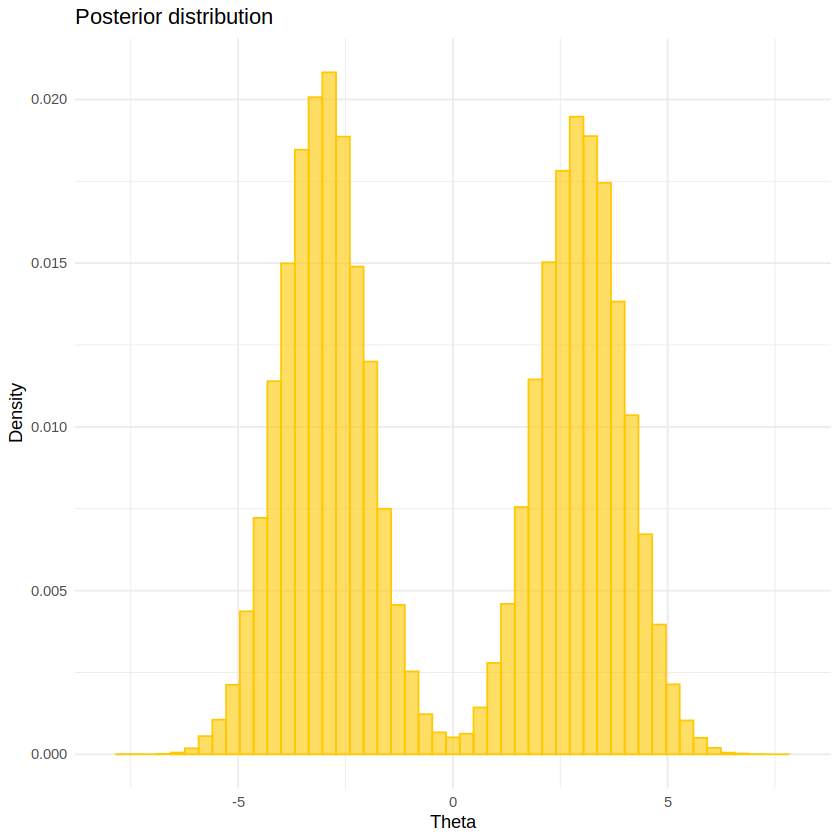

Normalized effective size = 0.06256925 
#################################

Running with burn_in = 40000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


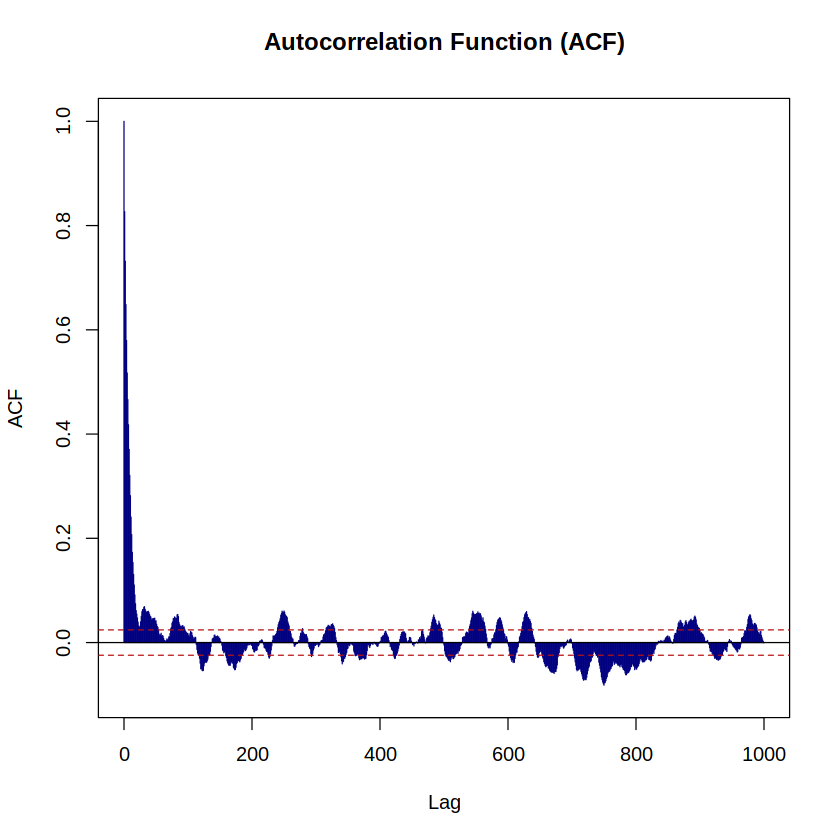

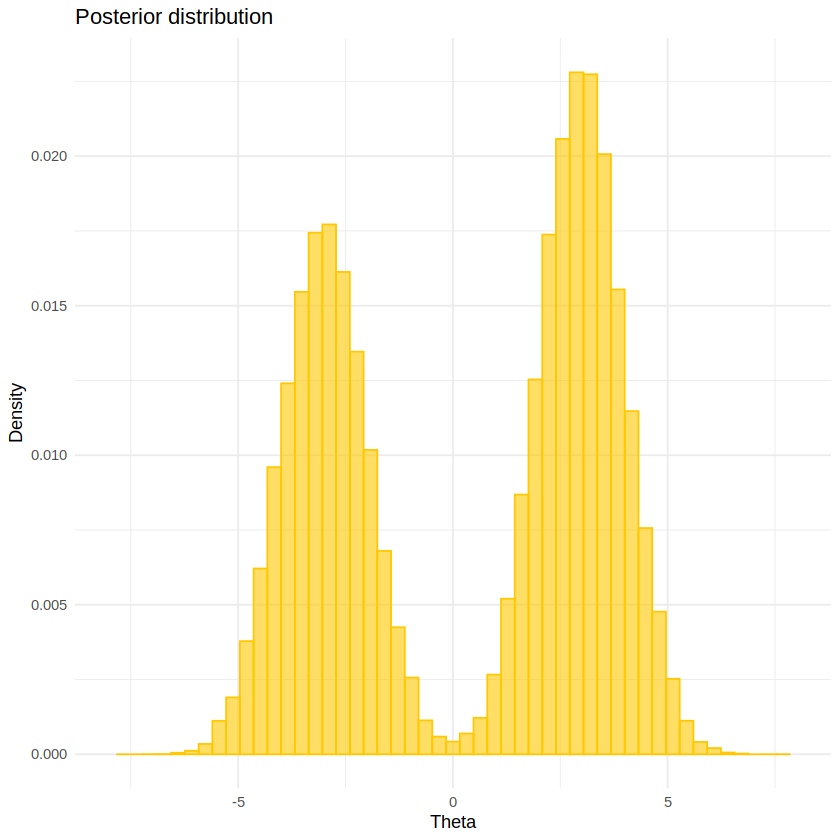

Normalized effective size = 0.003194622 
#################################

Running with burn_in = 40000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


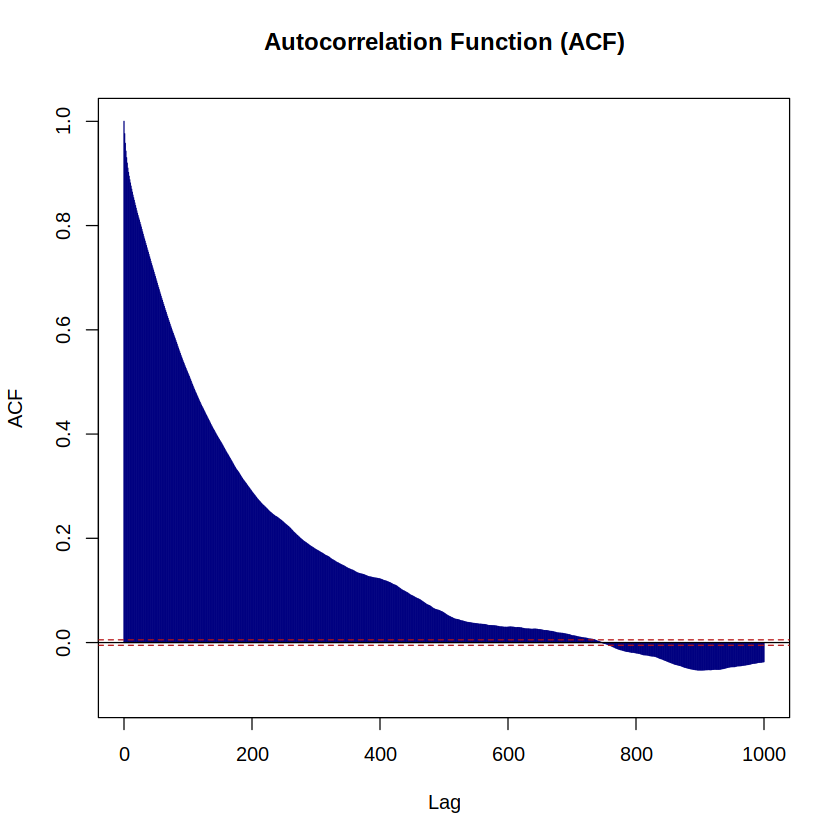

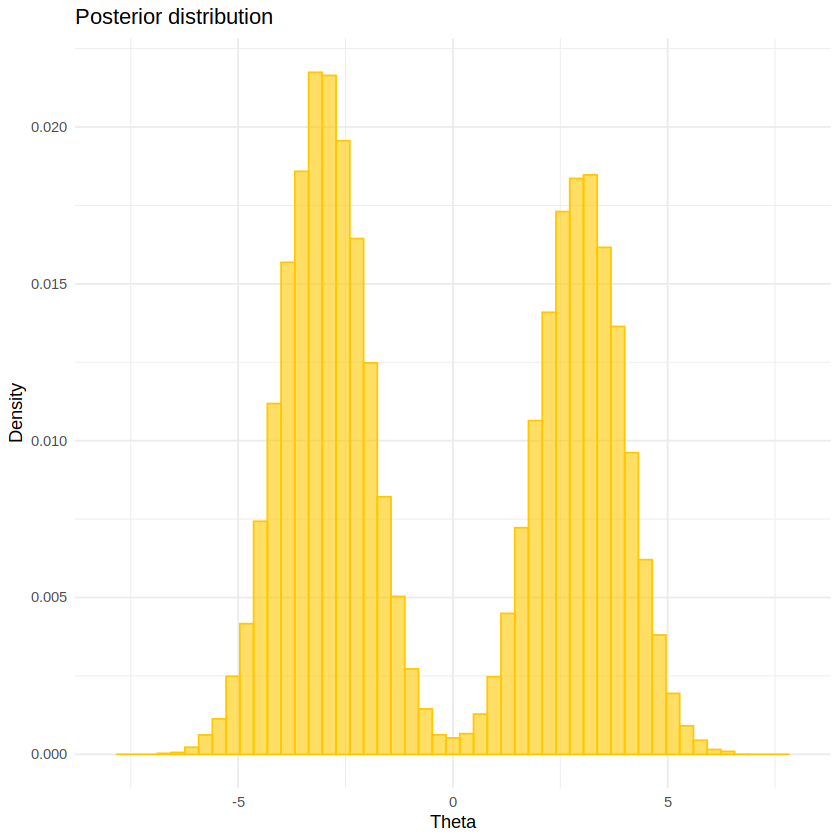

Normalized effective size = 0.01652431 
#################################

Running with burn_in = 40000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


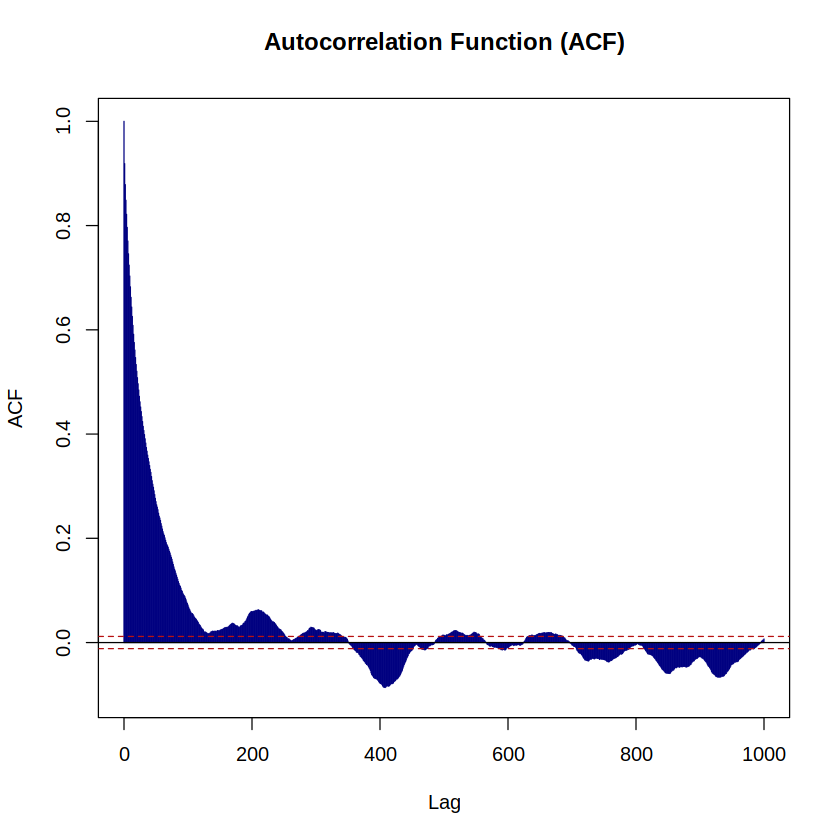

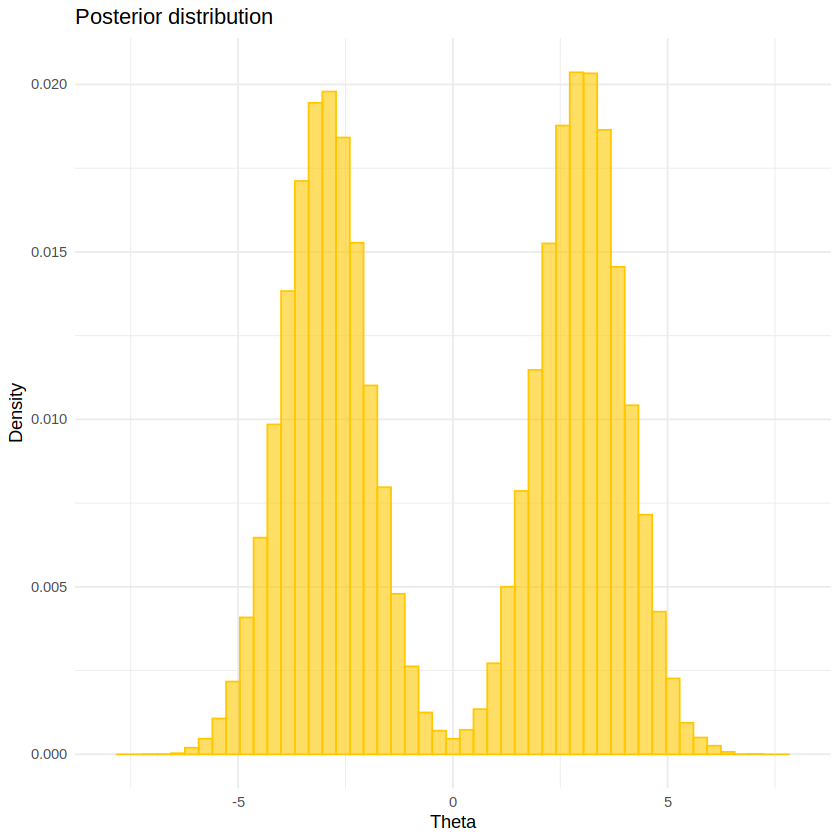

Normalized effective size = 0.03295253 
#################################

Running with burn_in = 40000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


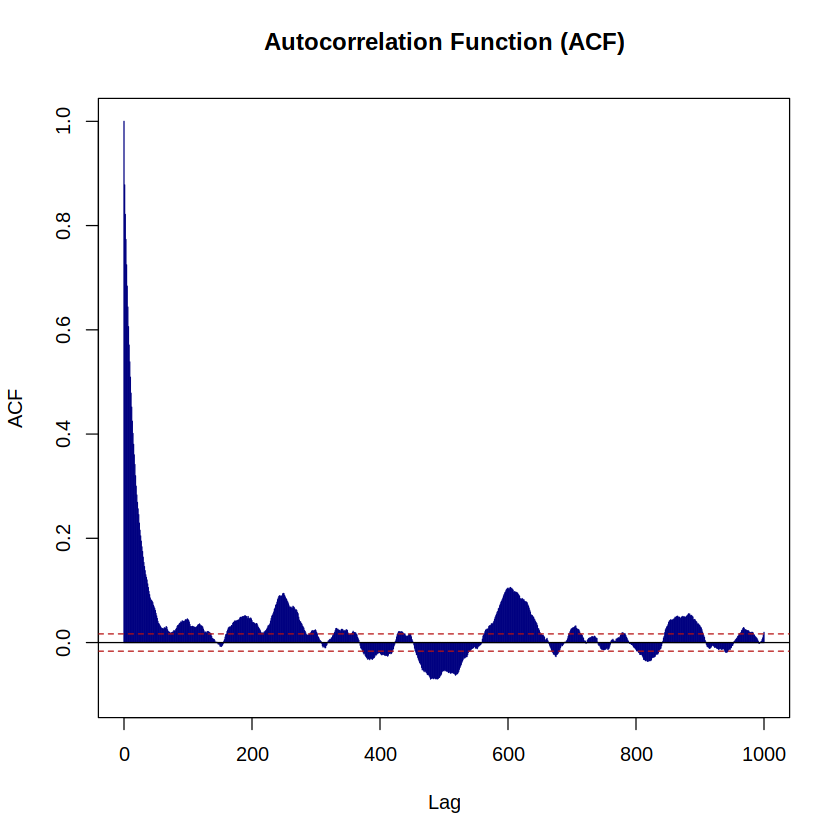

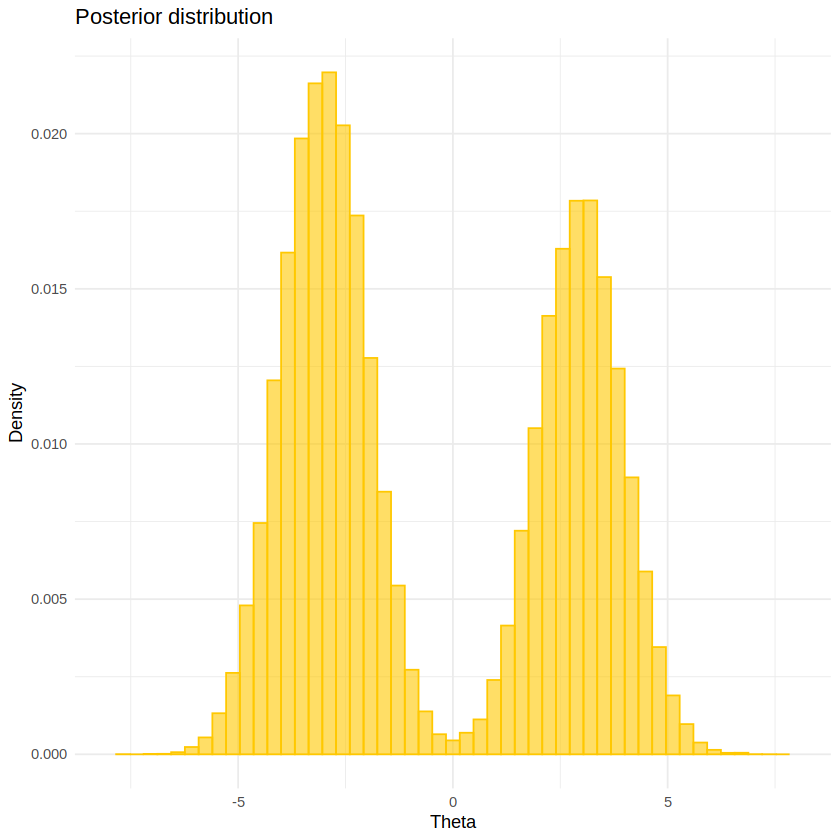

Normalized effective size = 0.05462082 
#################################

Running with burn_in = 40000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


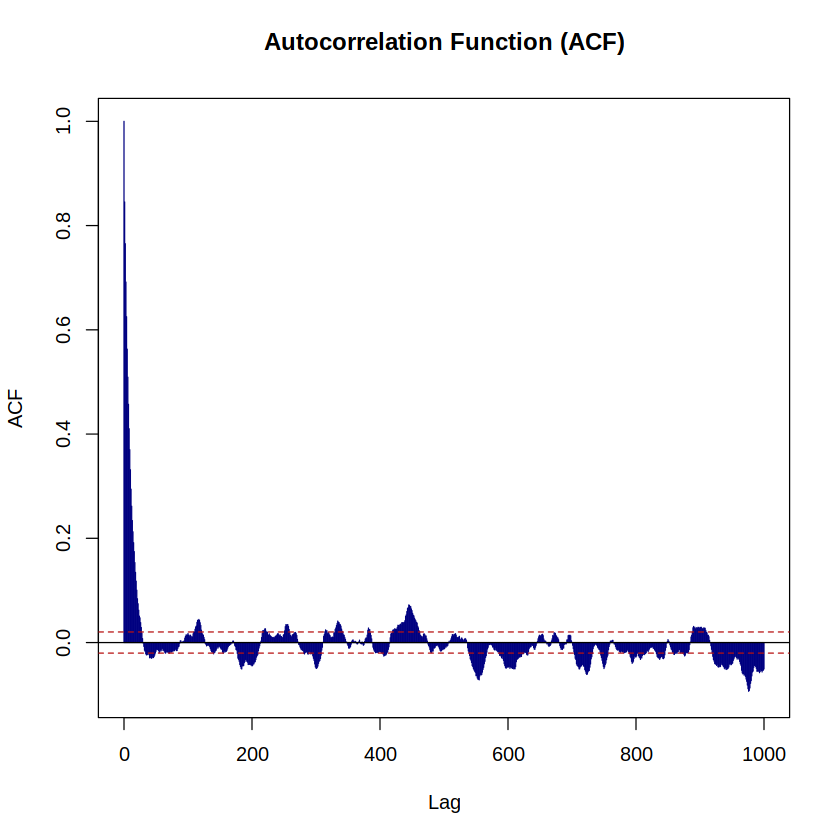

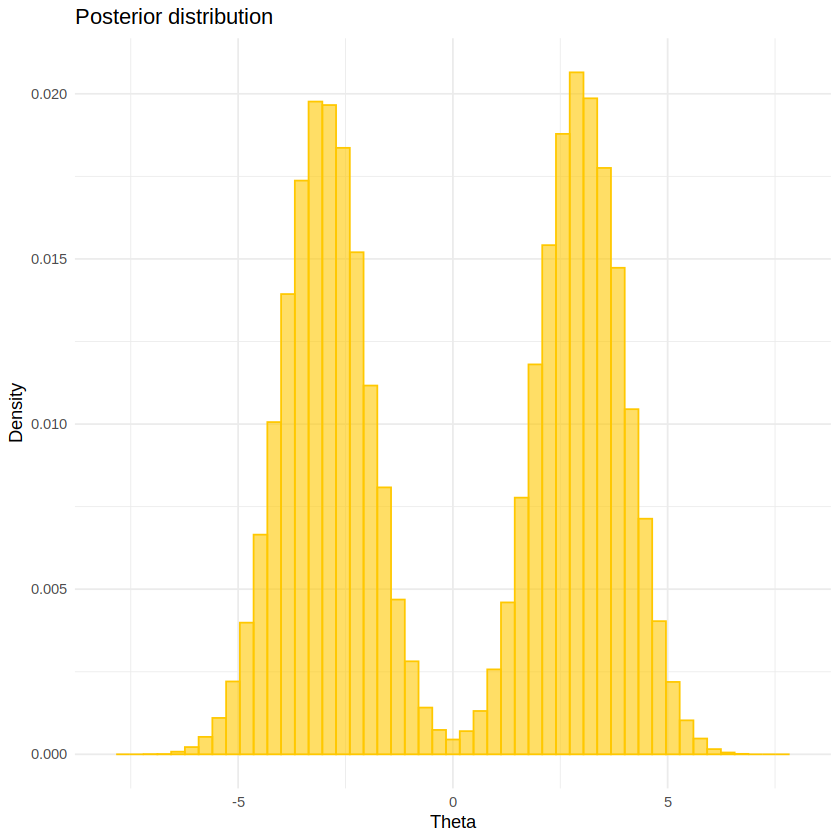

Normalized effective size = 0.05610295 
#################################

Running with burn_in = 50000 and thinning = 1 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


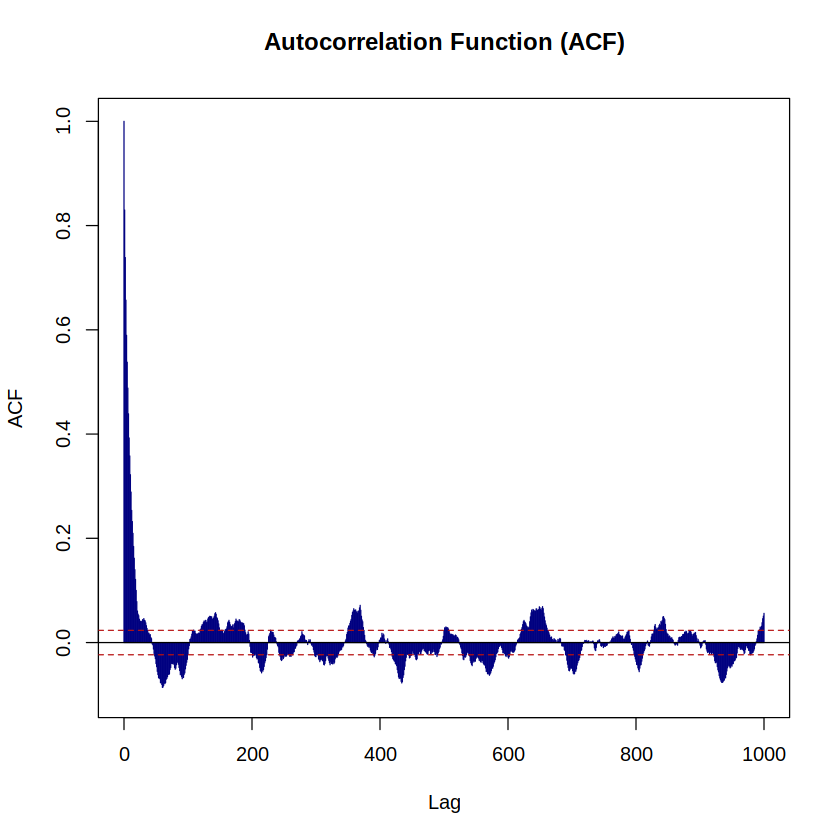

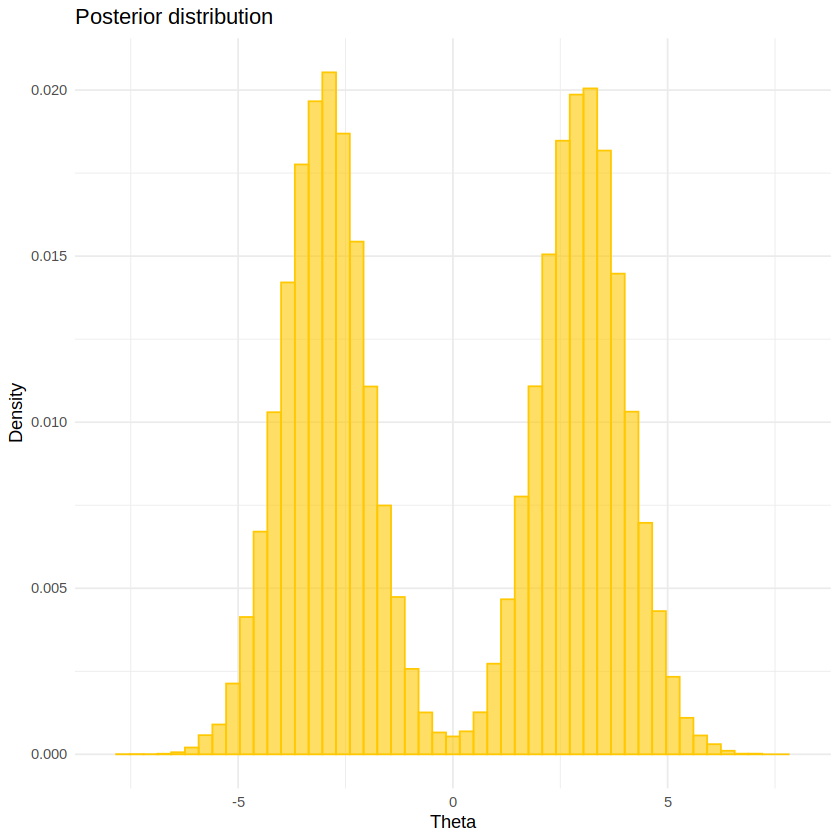

Normalized effective size = 0.003391174 
#################################

Running with burn_in = 50000 and thinning = 5 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


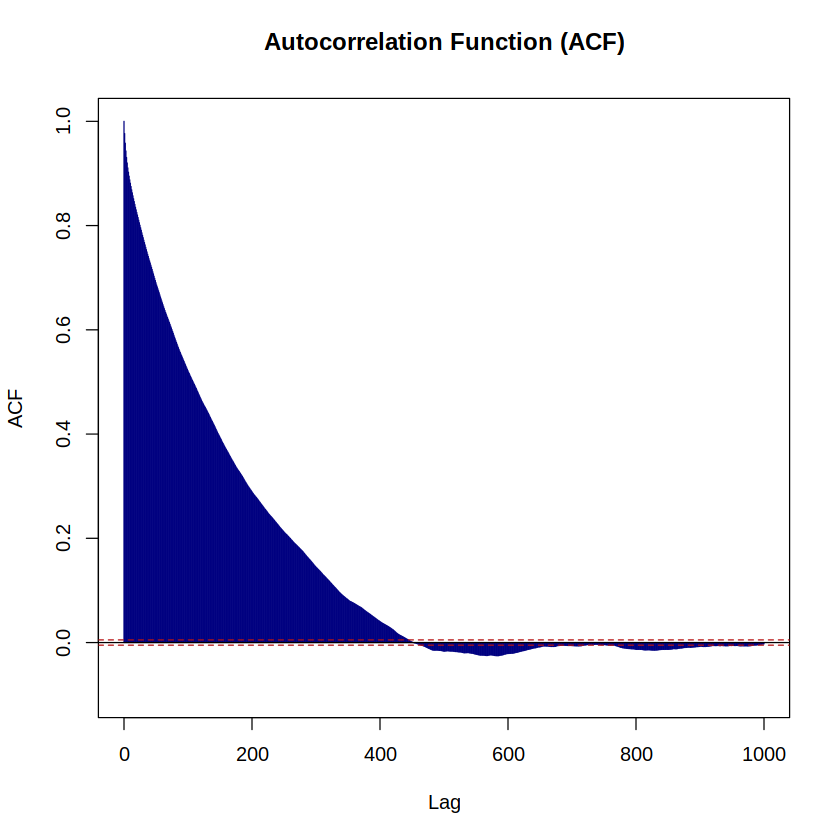

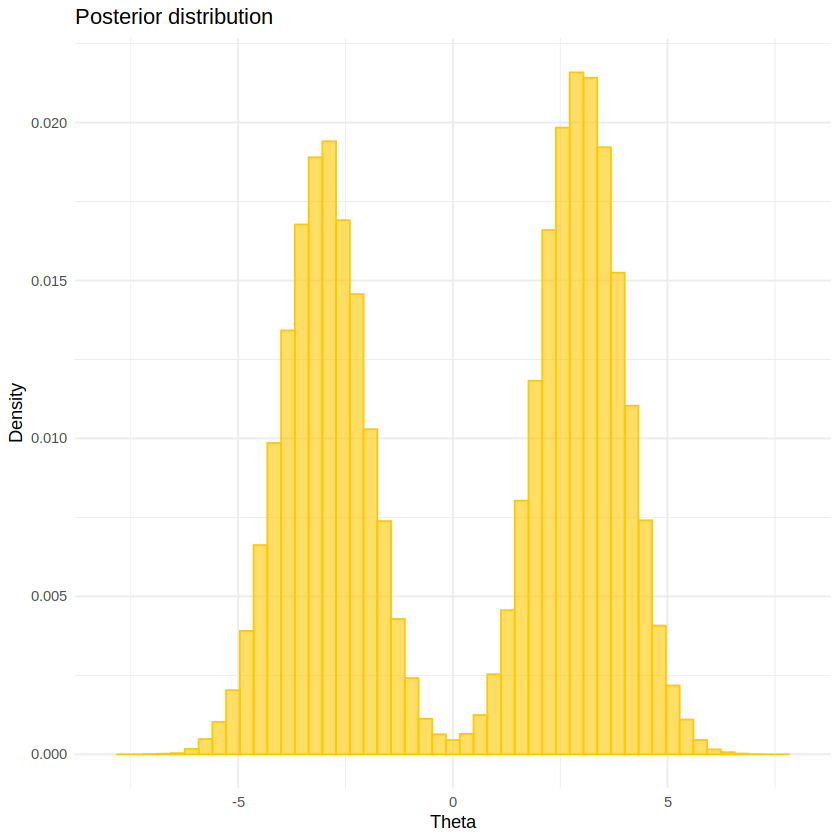

Normalized effective size = 0.01544603 
#################################

Running with burn_in = 50000 and thinning = 10 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


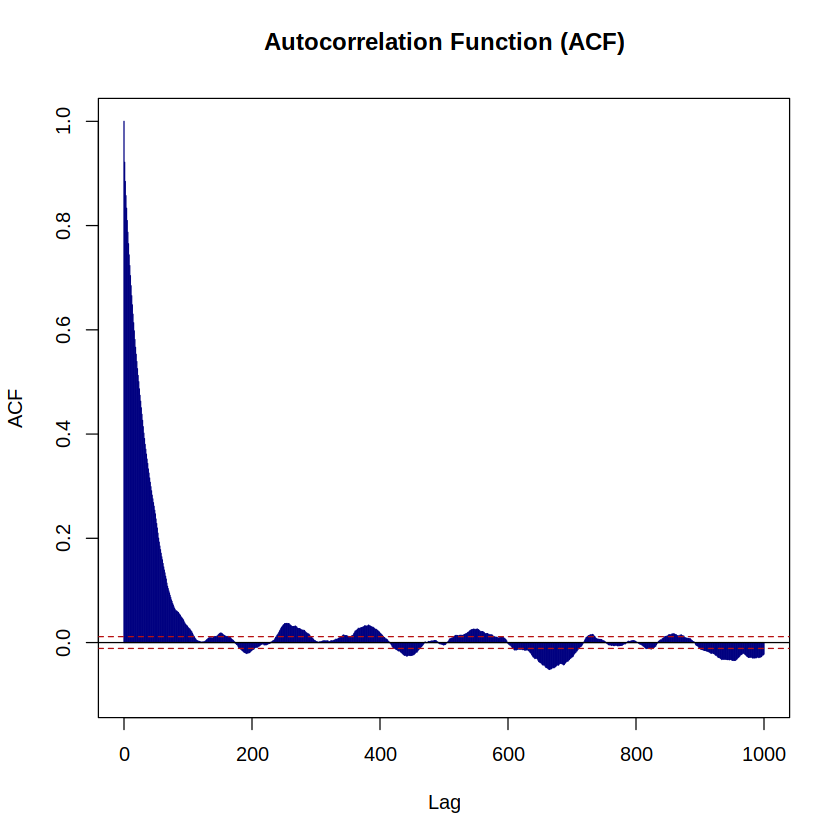

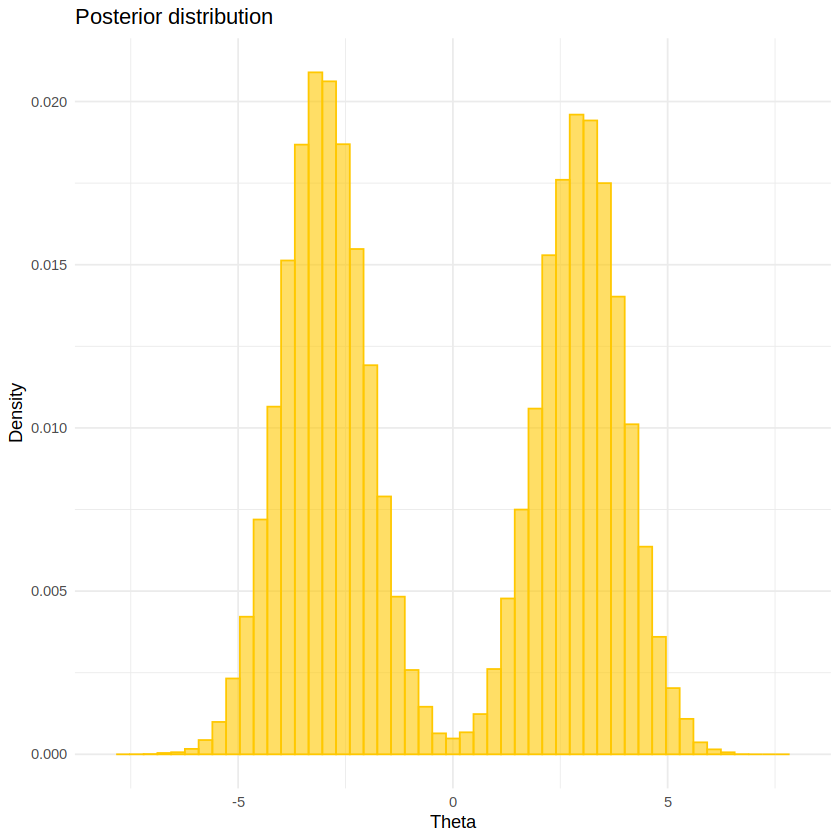

Normalized effective size = 0.03241117 
#################################

Running with burn_in = 50000 and thinning = 15 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


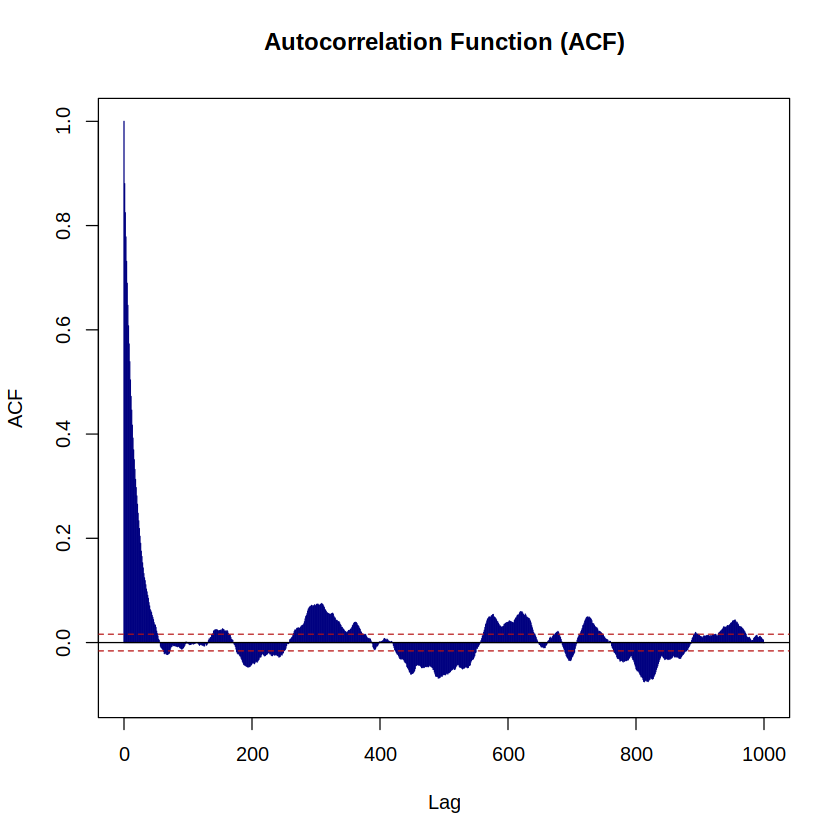

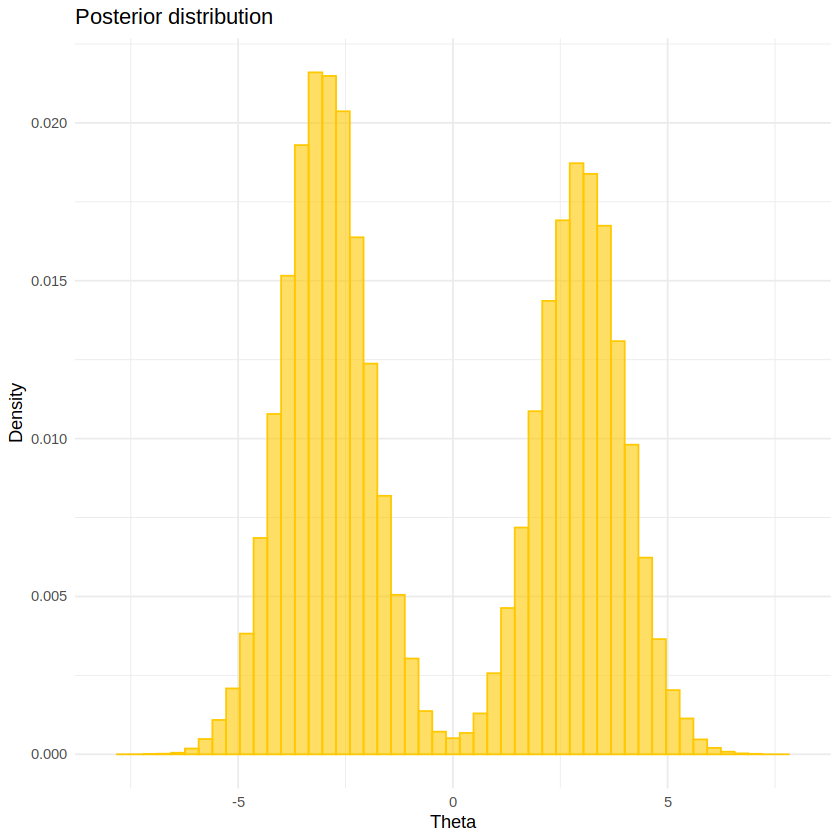

Normalized effective size = 0.04742121 
#################################

Running with burn_in = 50000 and thinning = 20 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


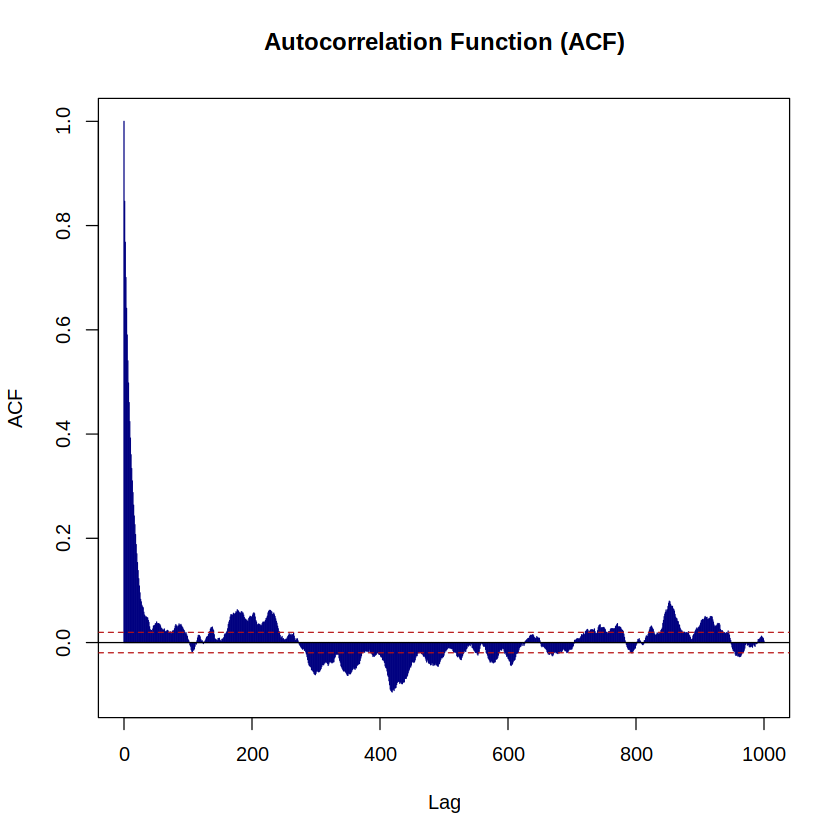

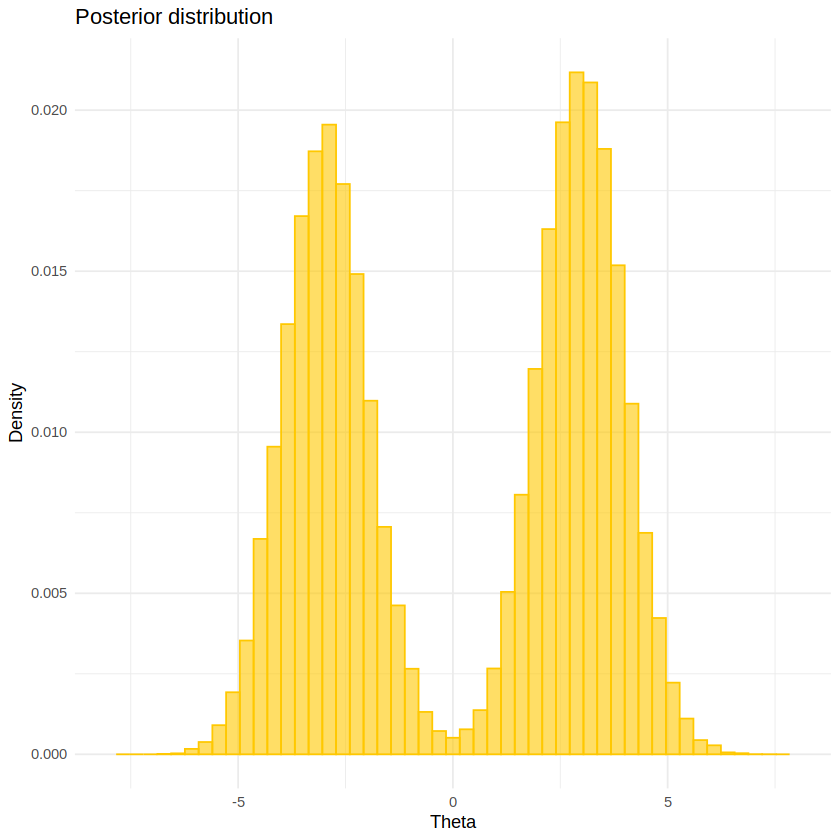

Normalized effective size = 0.06428157 
#################################



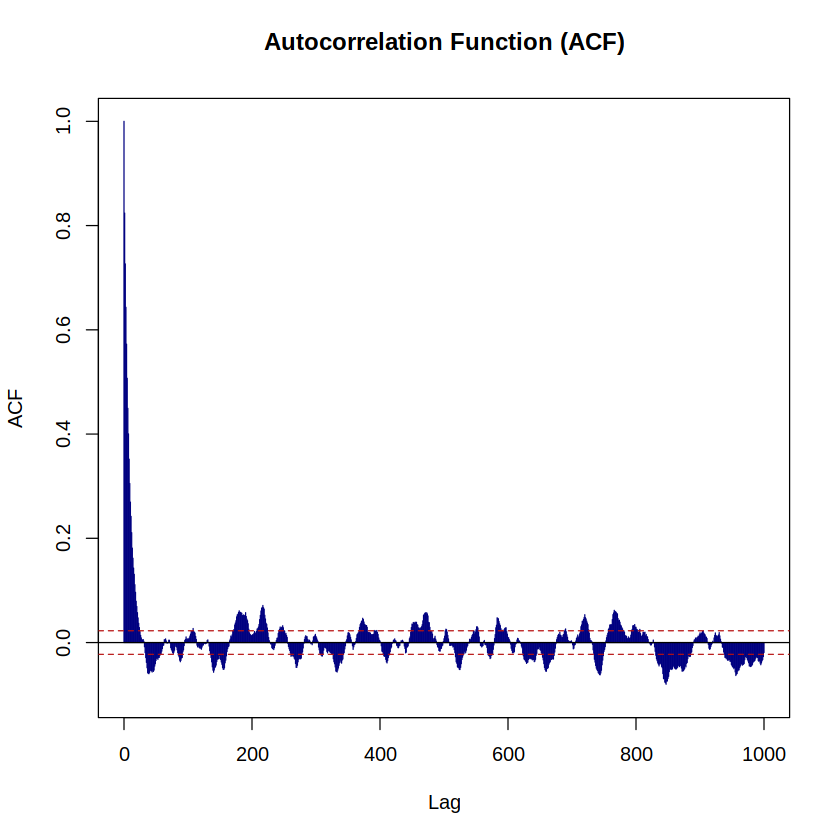

In [7]:
burn_in_values <- c(100, 1000, 5000, 10000, 20000, 30000, 40000, 50000)
thinning_values <- c(1, 5, 10, 15, 20)
lag_max <- 1000
n_sample <- 100000
n_bins <- 50

effective_sizes <- list()

effective_sizes <- data.frame(burn_in = integer(), thinning = integer(),
                              eff_size = numeric())

for (burn_in in burn_in_values) {
  for (thinning in thinning_values) {
    cat("Running with burn_in =", burn_in, "and thinning =", thinning, "\n")

    random_theta <- rnorm(1, 0, 1)
    out <- metropolis_sampler(random_theta, n_sample, burn_in)
    plot_posterior(out$value, theta_values, post_values, n_bins)
    eff_size <- plot_acf(out, thinning, lag_max)

    cat("Normalized effective size =", eff_size, "\n")
    effective_sizes <- rbind(effective_sizes,
                             data.frame(burn_in = burn_in, thinning = thinning,
                                        eff_size = eff_size))

    cat("#################################\n\n")
  }
}

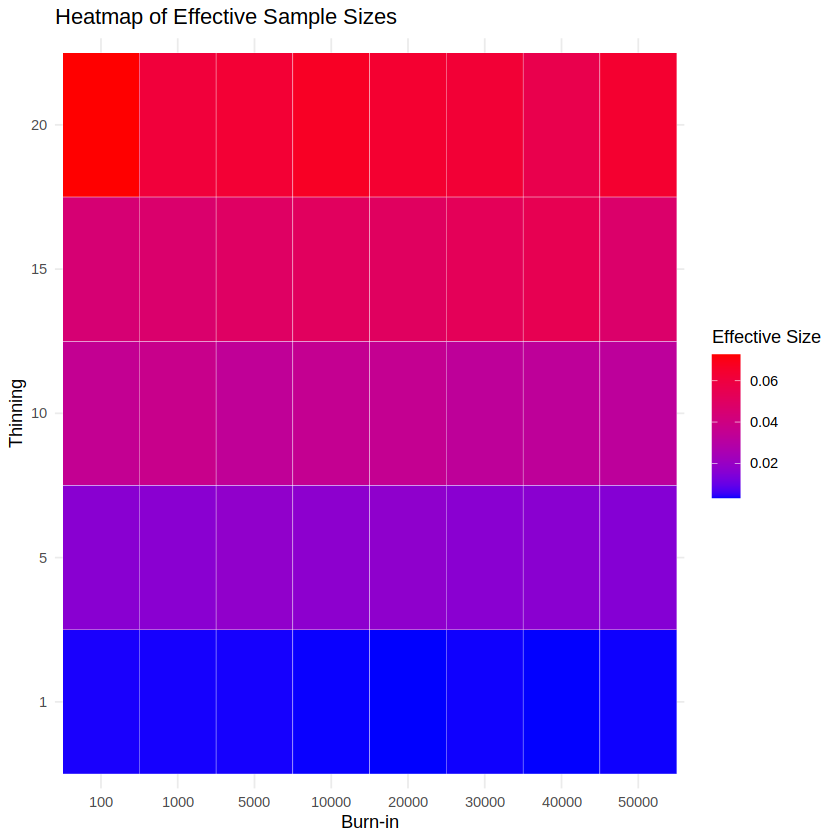

In [10]:
ggplot(effective_sizes, aes(x = as.factor(burn_in),
                            y = as.factor(thinning), fill = eff_size)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Heatmap of Effective Sample Sizes",
       x = "Burn-in", y = "Thinning", fill = "Effective Size") +
  theme_minimal()

In [9]:
filtered_data

ERROR: Error in eval(expr, envir, enclos): object 'filtered_data' not found


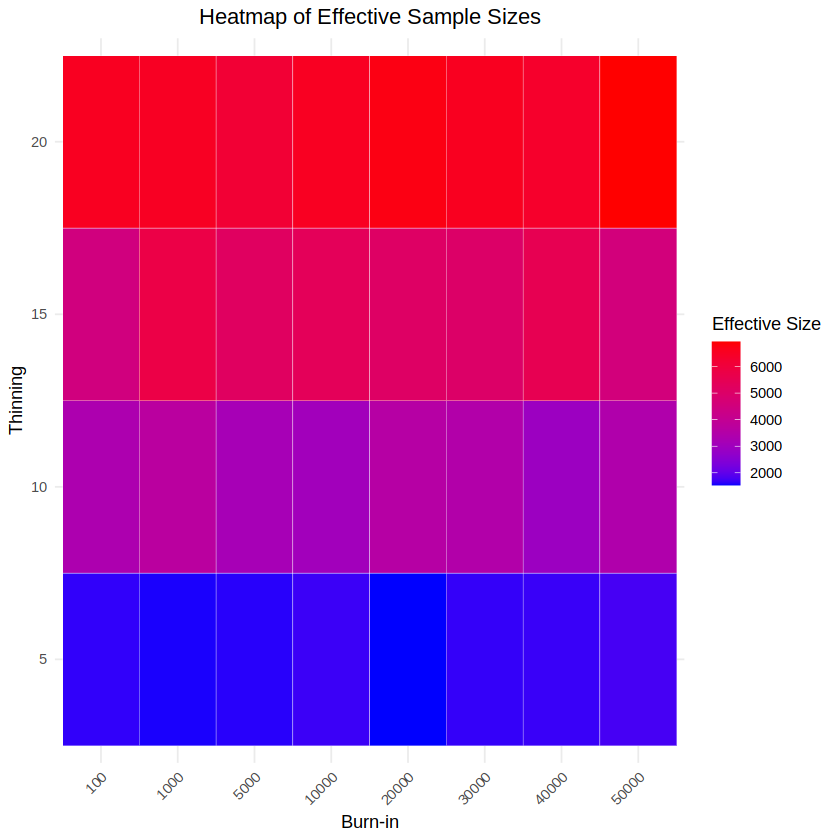

In [ ]:
filtered_data <- effective_sizes %>%
  mutate(eff_size = eff_size * n_sample) %>%
  filter(thinning != 1)

# Create the heatmap plot with the filtered data
ggplot(filtered_data, aes(x = as.factor(burn_in),
                          y = as.factor(thinning), fill = eff_size)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Heatmap of Effective Sample Sizes",
       x = "Burn-in", y = "Thinning", fill = "Effective Size") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5), # Center the title
    axis.text.x = element_text(angle = 45, hjust = 1) # Rotate x-axis labels for better readability
  )

# Exercise 2

A set of measured data should follow, according to the physics model applied to them, a linear behavior. Data are the following:

$
\left\{ (X, Y) \right\} = \left\{(5, -7.821); (6, -1.494); (7, -15.444); (8, -10.807), (9, -13.735), (10, -14.442), (11, -15.892), (12, -18.326) \right\}
$

- Perform a simple linear regression model running a Markov Chain Monte Carlo with JAGS, assuming that data follow the model: $ Z[i] = a + b * X[i] $ 
- The likelihood of the measured data follow a Gaussian likelihood distribution: $Y[i] \sim \text{dnorm}(Z[i], \: c)$
- You can constrain the parameter a, b and c to the following intervals: $a \in [1,10]$, $b \in [−1,3]$ and $c \in [0.034,4]$ 
- Run JAGS experimenting with the burnin and number of iterations of the chain. Plot the evolution of the chains and the posterior distributions of a and b. Compute the 95% credibility interval for the parameters.
- Using the obtained posterior distributions, compute the posterior distribution of $\sigma = \frac{1}{\sqrt{c}}$

In [18]:
x <- c(5, 6, 7, 8, 9, 10, 11, 12)
y <- c(-7.821, -1.494, -15.444, -10.807, -13.735, -14.442, -15.892, -18.326)
data <- data.frame(X = x, Y = y)

In [19]:
model_string <- "
model { 
    # data likelihood 
    for (i in 1:length(Y)) { 
        Y[i] ~ dnorm(Z[i], c);
    } 
    
    # uniform priors for a, b, c 
    a ~ dunif(1, 10); 
    b ~ dunif(-1, 3); 
    c ~ dunif(0.034, 4); 
    
    # expected Z
    Z <- a + b * X
}
"

In [20]:
inits <- function() {
  list(a = runif(1, 1, 10), b = runif(1, -1, 3), c = runif(1, 0.034, 4))
}

In [21]:
model <- jags.model(textConnection(model_string), data = data,
                    inits = inits, n.chains = 3)

update(model, 2000) # burn-in
samples <- coda.samples(model, c("a", "b", "c"), n.iter = 10000)
summary(samples)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 3
   Total graph size: 36

Initializing model




Iterations = 3001:13000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

      Mean       SD  Naive SE Time-series SE
a  1.46860 0.458239 2.646e-03      0.0060308
b -0.94765 0.050757 2.930e-04      0.0006453
c  0.04414 0.009375 5.412e-05      0.0001176

2. Quantiles for each variable:

      2.5%      25%      50%     75%    97.5%
a  1.01220  1.13525  1.32772  1.6554  2.69828
b -0.99862 -0.98442 -0.96297 -0.9270 -0.81112
c  0.03426  0.03715  0.04147  0.0484  0.06885


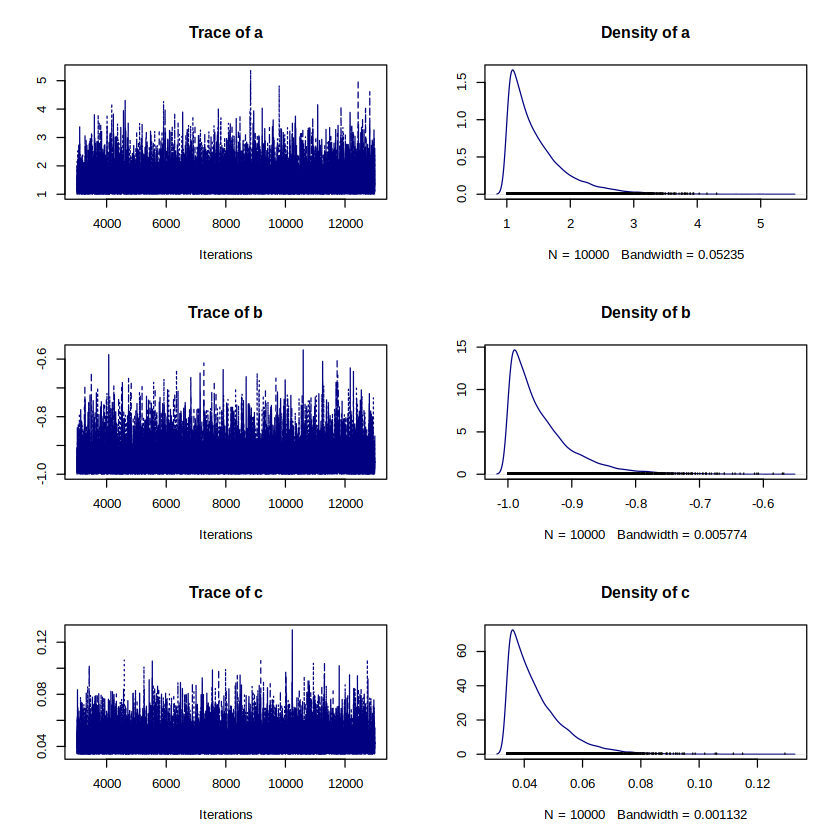

In [25]:
plot(samples, col = "navy")

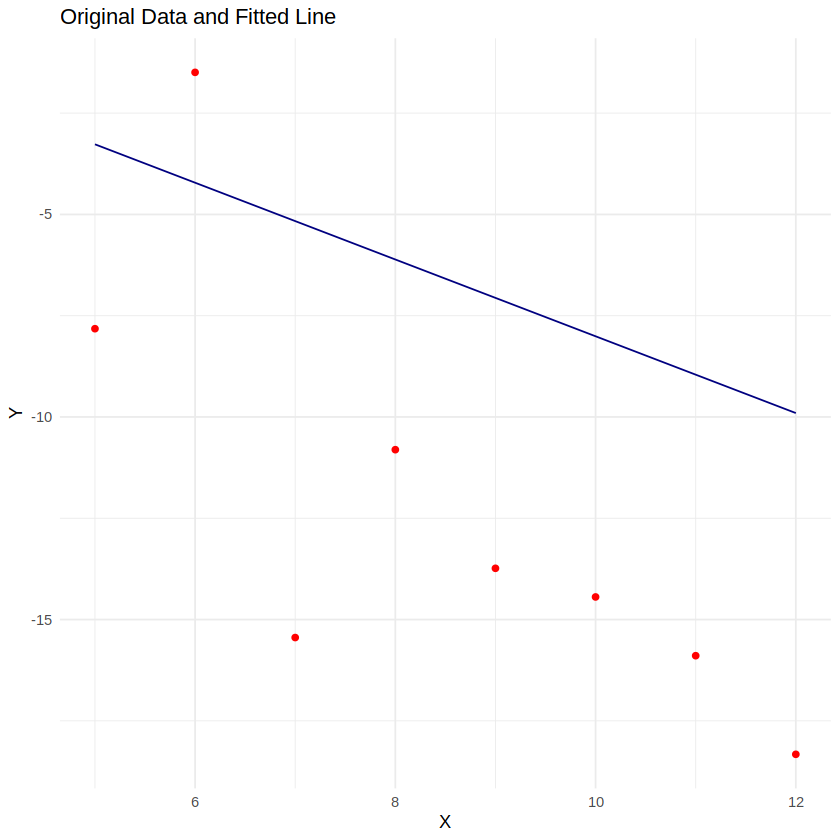

In [32]:
combined_samples <- do.call(rbind, samples)
fit_params <- colMeans(as.data.frame(combined_samples))

x_fit <- seq(min(data$X), max(data$X), by = 0.01)
y_fit <- fit_params["a"] + fit_params["b"] * x_fit

ggplot(data, aes(x = X, y = Y)) +
  geom_point(color = "red") +
  geom_line(data = data.frame(x_fit, y_fit),
            aes(x = x_fit, y = y_fit), color = "navy") +
  labs(title = "Original Data and Fitted Line",
       x = "X",
       y = "Y") +
  theme_minimal()

In [53]:
quantiles <- summary(samples)$quantiles
quantiles_95_percent <- as.data.frame(quantiles[, c("2.5%", "97.5%")])
cat("95% credibility intervals:\n\n")
print(quantiles_95_percent)

95% credibility intervals:

         2.5%       97.5%
a  1.01219512  2.69828427
b -0.99861703 -0.81111582
c  0.03426249  0.06885369


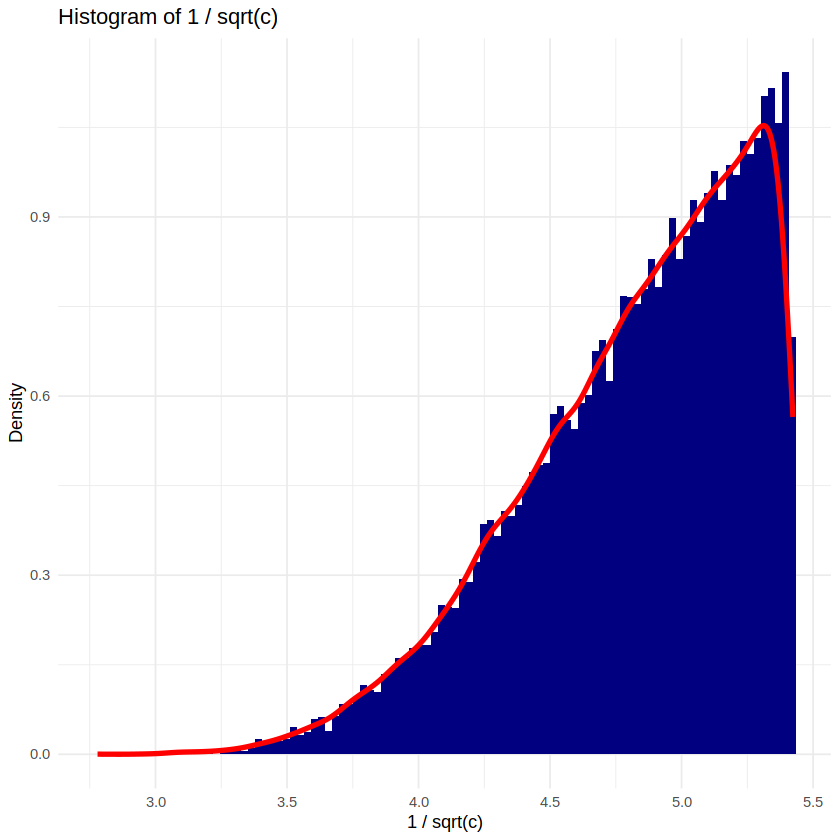

In [74]:
c_posterior <- as.data.frame(combined_samples)[["c"]]
sigma_posterior <- 1 / sqrt(c_posterior)

ggplot(data = data.frame(sigma_posterior), aes(x = sigma_posterior)) +
  geom_histogram(aes(y = after_stat(density)), bins = 100, fill = "navy") +
  geom_density(color = "red", linewidth = 1.5) +
  labs(title = "Histogram of 1 / sqrt(c)",
       x = "1 / sqrt(c)",
       y = "Density") +
  theme_minimal()

# Exercise 3

Suppose we observe the following values: $x = 2.06, 5.56, 7.93, 6.56, 205$ and we assume that the data come from a gaussian distribution with unknown mean $\mu$ and variance $\sigma ^ 2$.

- Build a simple JAGS model and run a Markov Chain Monte Carlo to obtain the posterior distribution of the mean and variance. 
- Assume uniform prior distributions for the parameters, $\mu \sim dunif(-10, 10)$ and $\sigma \sim dunif(0,50)$. 
- Compute also the posterior distribution for $\mu / \sigma$.

In [93]:
x <- c(2.06, 5.56, 7.93, 6.56, 205)
data <- list(X = x, N = length(x))

In [94]:
model_string <- "
model { 
    # data likelihood 
    for (i in 1:N) {
        X[i] ~ dnorm(mu, sigma^2);
    } 
    
    # uniform priors for mu, sigma 
    mu ~ dunif(-10, 10); 
    sigma ~ dunif(0, 50); 
}
"

In [95]:
inits <- function() {
  list(mu = runif(1, -10, 10), sigma = runif(1, 0, 50))
}

In [101]:
model <- jags.model(textConnection(model_string), data = data,
                    inits = inits, n.chains = 3)

update(model, 2000) # burn-in
samples <- coda.samples(model, c("mu", "sigma"), n.iter = 10000)
summary(samples)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 2
   Total graph size: 14

Initializing model




Iterations = 3001:13000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean       SD  Naive SE Time-series SE
mu    1.09636 5.696684 3.289e-02      0.0442537
sigma 0.01153 0.003378 1.951e-05      0.0000246

2. Quantiles for each variable:

           2.5%       25%     50%    75%   97.5%
mu    -9.283386 -3.620050 1.59600 6.0878 9.64291
sigma  0.005464  0.009131 0.01135 0.0137 0.01862


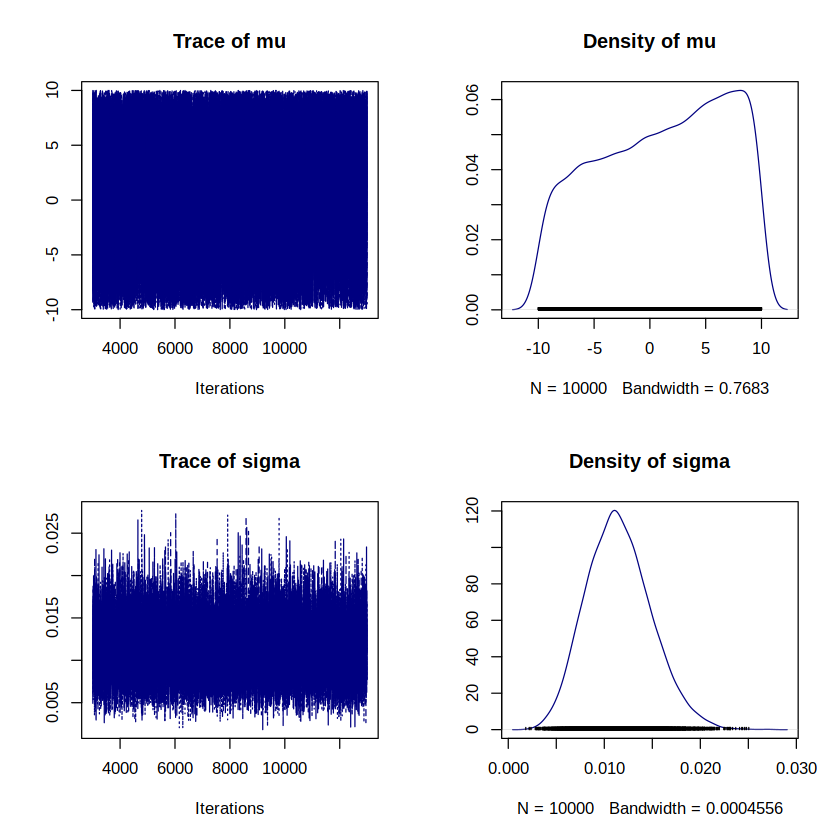

In [102]:
plot(samples, col = "navy")

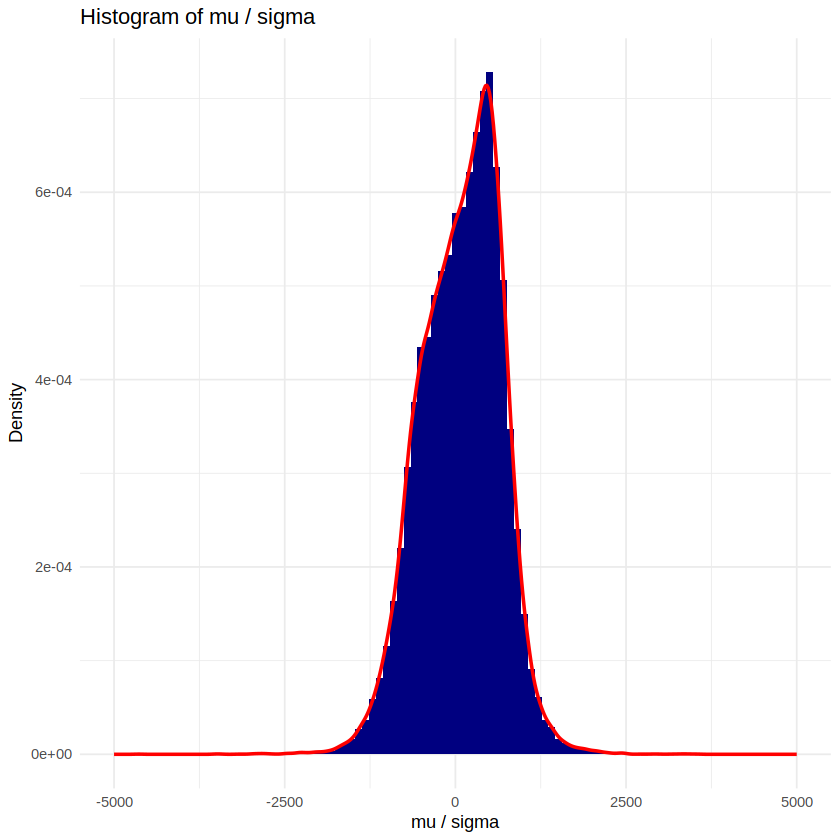

In [112]:
combined_samples <- do.call(rbind, samples)
mu_posterior <- as.data.frame(combined_samples)[["mu"]]
sigma_posterior <- as.data.frame(combined_samples)[["sigma"]]
mu_over_sigma <- mu_posterior / sigma_posterior

ggplot(data = data.frame(mu_over_sigma), aes(x = mu_over_sigma)) +
  geom_histogram(aes(y = after_stat(density)), bins = 100, fill = "navy") +
  geom_density(color = "red", linewidth = 1) +
  labs(title = "Histogram of mu / sigma",
       x = "mu / sigma",
       y = "Density") +
  xlim(-5000, +5000) +
  theme_minimal()